In [1]:
%matplotlib inline
import numpy as np
import pylab as plt
from matplotlib.gridspec import GridSpec
from astropy.table import Table, vstack, Column, MaskedColumn
from astropy import units as u
from scipy.stats import kde
from scipy.stats import binned_statistic as b_s
from scipy.stats import binned_statistic_2d as bs2d
from astropy import units as un
from astropy import constants as con
from matplotlib.lines import Line2D

from astropy.cosmology import Planck15
from tqdm import trange
from scipy.stats import ks_2samp
from scipy import special

import os
os.environ['PATH'] = os.environ['PATH'] + ':/usr/texbin'

plt.rc('path', simplify=True)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('axes', labelsize='xx-large', facecolor='none', linewidth=0.7)
plt.rc('xtick', labelsize='x-large')
plt.rc('ytick', labelsize='x-large')
plt.rc('lines', markersize=4, linewidth=1, markeredgewidth=0.2)
plt.rc('legend', numpoints=1, frameon=False, handletextpad=0.3, scatterpoints=1, handlelength=2, handleheight=0.1)
#plt.rc('savefig', facecolor='none', frameon='False')

params =   {'font.size' : 16,
            'xtick.major.size': 8,
            'ytick.major.size': 8,
            'xtick.minor.size': 3,
            'ytick.minor.size': 3,
            }
plt.rcParams.update(params) 

np.warnings.filterwarnings('ignore')

def legend_outside_plot(ax,location='top',ncol=3,pad=0, handles=None, labels=None):
    if handles==None:
        handles, labels = ax.get_legend_handles_labels()
    if location=='top':
        leg = ax.legend(handles=handles, labels=labels, bbox_to_anchor=(0,1.02+pad,1,0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=ncol)
    else:
        print("Location",location,"not implemented. Please code up")
    return leg


In [2]:
IR = Table.read('IRnocut', format = 'fits' )

In [3]:
IR.rename_column('col1', 'RAdeg')  
IR.rename_column('col2', 'DEdeg') 
IR.rename_column('col3', 'Imag') 
IR.rename_column('col4', 'S')  
IR.rename_column('col5', 'zspec') 
IR.rename_column('col6', 'N')  
IR.rename_column('col7', 'zG')  
IR.rename_column('col8', 'chi2G')  
IR.rename_column('col9', 'LEll')  
IR.rename_column('col10', 'LSbc') 
IR.rename_column('col11', 'LIrr')
IR.rename_column('col12', 'zGA') 
IR.rename_column('col13', 'chi2GA') 
IR.rename_column('col14', 'LAGNp') 
IR.rename_column('col15', 'LELLp') 
IR.rename_column('col16', 'LSbcp') 
IR.rename_column('col17', 'LIrrp') 
IR.rename_column('col18', 'F') 
IR.rename_column('col19', 'EBV') 
IR.rename_column('col20', 'LAGNerg') 
IR.rename_column('col21', 'logF') 
IR.rename_column('col22', 'I') 
IR.rename_column('col23', 'index') 
IR.rename_column('col24', 'LSbcerg') 
IR.rename_column('col25', 'LEllerg') 
IR.rename_column('col26', 'LIrrerg') 
IR.rename_column('col27', 'Lg') 
IR.rename_column('col28', 'LGlog') 
IR.rename_column('col29', 'LSbcergp') 
IR.rename_column('col30', 'LEllergp') 
IR.rename_column('col31', 'LIrrergp') 
IR.rename_column('col32', 'Lgp') 
IR.rename_column('col33', 'LGlogp') 



In [4]:
F10p = IR[IR['F']>=10]
F5p = IR[IR['F']>=5]
F20p = IR[IR['F']>=20]



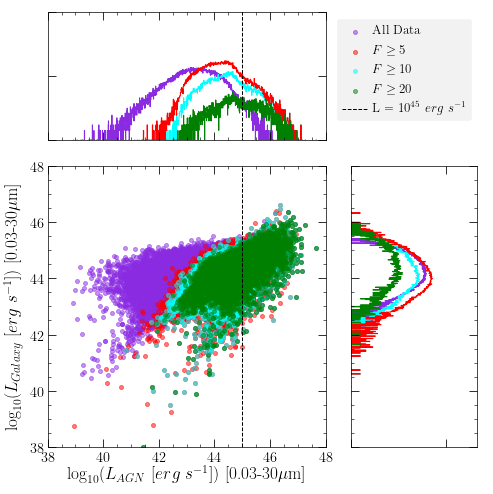

In [44]:
fig = plt.figure(figsize=(24,8))
gs = GridSpec(nrows=3,ncols=9, figure=fig)


ax = fig.add_subplot(gs[1:, 0:2])
ax.scatter(IR['LAGNerg'],IR['LGlogp'],c = 'blueviolet',label = 'All Data' ,alpha = 0.5)
ax.scatter(F5p['LAGNerg'],F5p['LGlogp'],c = 'red',label = r'$F \ge 5$' ,alpha = 0.5)
ax.scatter(F10p['LAGNerg'],F10p['LGlogp'],c = 'cyan',label = r'$F \ge 10$' ,alpha = 0.5)
ax.scatter(F20p['LAGNerg'],F20p['LGlogp'],c = 'green',label = r'$F \ge 20$' ,alpha = 0.5)
ax.vlines(45, -20, 10**4, colors='black', linestyles='dashed', label='L = $10^{45}\ erg\ s^{-1}$')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_ylabel(r'$ \log_{10}(L_{Galaxy}\ [erg\ s^{-1}])$ [0.03-30$\mu$m]')
ax.set_xlabel(r'$ \log_{10}(L_{AGN}\ [erg\ s^{-1}])$ [0.03-30$\mu$m]')
ax.set_xlim(38, 48)
ax.set_ylim(38,48)
handles, labels = ax.get_legend_handles_labels()

ax = fig.add_subplot(gs[0, 2])
ax.axis('off')
ax.legend(handles=handles, labels=labels, prop={'size': 13},frameon = True, framealpha=0.1, facecolor = 'gray')

ax = fig.add_subplot(gs[0, 0:2])
ax.hist(IR['LAGNerg'], bins=1000, histtype='step', color='blueviolet', density=False, lw=1, label="x", log=True)
ax.hist(F10p['LAGNerg'], bins=1000, histtype='step', color='cyan', density=False, lw=1, label="x", log=True)
ax.hist(F5p['LAGNerg'], bins=1000, histtype='step', color='red', density=False, lw=1, label="x", log=True)
ax.hist(F20p['LAGNerg'], bins=1000, histtype='step', color='green', density=False, lw=1, label="x", log=True)
ax.vlines(45, -20, 10**4, colors='black', linestyles='dashed', label='L = $10^{45}$ erg/s')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_xlim(38, 48)
ax.set_ylim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)

ax = fig.add_subplot(gs[1:, 2])
ax.hist(IR['LGlogp'], bins=1000,orientation='horizontal', histtype='step', color='blueviolet', density=False, lw=1, label="y", log=True)
ax.hist(F10p['LGlogp'], bins=1000,orientation='horizontal', histtype='step', color='cyan', density=False, lw=1, label="y", log=True)
ax.hist(F5p['LGlogp'], bins=1000,orientation='horizontal', histtype='step', color='red', density=False, lw=1, label="y", log=True)
ax.hist(F20p['LGlogp'], bins=1000,orientation='horizontal', histtype='step', color='green', density=False, lw=1, label="y", log=True)
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_ylim(38,48)
ax.set_xlim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)

plt.savefig('Figure4.png')

(0, 300)

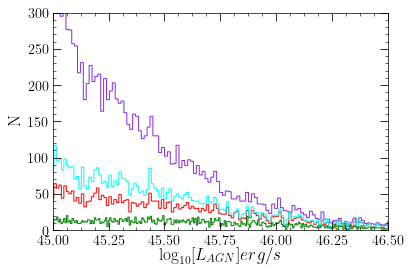

In [6]:
plt.hist(IR['LAGNerg'], bins=1000, histtype='step', color='blueviolet', density=False, lw=1, label="x")
plt.hist(F10p['LAGNerg'], bins=1000, histtype='step', color='red', density=False, lw=1, label="x")
plt.hist(F5p['LAGNerg'], bins=1000, histtype='step', color='cyan', density=False, lw=1, label="x")
plt.hist(F20p['LAGNerg'], bins=1000, histtype='step', color='green', density=False, lw=1, label="x")
#plt.vlines(45, -20, 10**4, colors='black', linestyles='dashed', label='L = $10^{45}$ erg/s')
plt.xlabel(r'$ \log_{10}[L_{AGN}] erg/s$')
plt.ylabel(r'N')
plt.minorticks_on()
plt.tick_params(which='both', direction='in', top="on", right='on')
plt.xlim(45, 46.5)
plt.ylim(0,300)


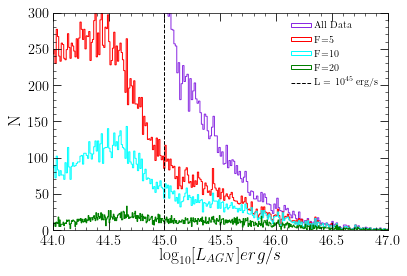

In [7]:
plt.hist(IR['LAGNerg'], bins=1000, histtype='step', color='blueviolet', density=False, lw=1, label="All Data")
plt.hist(F5p['LAGNerg'], bins=1000, histtype='step', color='red', density=False, lw=1, label="F=5")
plt.hist(F10p['LAGNerg'], bins=1000, histtype='step', color='cyan', density=False, lw=1, label="F=10")
plt.hist(F20p['LAGNerg'], bins=1000, histtype='step', color='green', density=False, lw=1, label="F=20")
plt.vlines(45, -20, 10**4, colors='black', linestyles='dashed', label='L = $10^{45}$ erg/s')
plt.xlabel(r'$ \log_{10}[L_{AGN}] erg/s$')
plt.ylabel(r'N')
plt.minorticks_on()
plt.tick_params(which='both', direction='in', top="on", right='on')
plt.xlim(44, 47)
plt.ylim(0,300)
plt.legend()


In [8]:
#problem is these are histograms so N is number in any given bin its not a cumulative frequency or whatever...


In [9]:
IR

RAdeg,DEdeg,Imag,S,zspec,N,zG,chi2G,LEll,LSbc,LIrr,zGA,chi2GA,LAGNp,LELLp,LSbcp,LIrrp,F,EBV,LAGNerg,logF,I,index,LSbcerg,LEllerg,LIrrerg,Lg,LGlog,LSbcergp,LEllergp,LIrrergp,Lgp,LGlogp
float64,float64,float32,float32,float32,bytes4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
217.18223,32.30523,22.77,0.95,-99.99,8/3,1.27,2.53,0.0,0.829,0.361,1.2,2.9,0.651,0.0,0.768,0.0,0.54,0.1,44.231,-0.26760624017703144,-30.18,1.0,44.409,43.58,43.940999999999995,3.437455404905813e+44,44.53623707264808,44.348,43.58,43.58,2.2284351492702984e+44,44.348
217.86705,32.30527,20.02,0.03,-99.99,12/0,0.54,37.08,0.44,0.47,-0.461,0.51,45.75,0.268,0.546,0.0,-0.237,0.24,0.5,43.848,-0.619788758288394,-29.15,2.0,44.05,44.019999999999996,43.119,2.3006694855720697e+44,44.36185423235735,43.58,44.126,43.342999999999996,1.5568881628517787e+44,44.19225741667808
217.88212,32.30531,22.67,0.03,-99.99,11/1,0.85,0.55,0.0,0.0,0.121,0.81,0.63,-0.31,0.0,0.0,-0.052,0.53,0.04,43.269999999999996,-0.27572413039921095,-28.79,3.0,43.58,43.58,43.701,5.023425895223877e+43,43.701,43.58,43.58,43.528,3.3728730865886787e+43,43.528
217.84705,32.30564,20.44,0.03,-99.99,11/0,1.08,18.79,0.0,1.319,1.2,1.01,23.96,0.802,0.0,1.278,0.947,0.24,0.05,44.382,-0.619788758288394,-28.42,4.0,44.899,43.58,44.78,1.3950609165548327e+45,45.14459317187199,44.858,43.58,44.527,1.0576190485583862e+45,45.024329264200276
217.70446,32.30566,19.34,0.92,-99.99,11/0,0.19,117.86,-0.28,-0.986,0.0,0.15,129.12,-0.636,-0.513,0.0,0.0,0.74,1.0,42.943999999999996,-0.13076828026902382,-28.27,5.0,42.594,43.3,43.58,2.3879072503684677e+43,43.37801745418454,43.58,43.067,43.58,1.166809617060963e+43,43.067
217.48821,32.30604,19.71,0.03,-99.99,9/1,0.41,1.13,0.0,-1.56,0.629,0.37,0.63,-0.693,0.0,0.0,0.51,2.96,0.0,42.887,0.4712917110589386,-28.0,6.0,42.019999999999996,43.58,44.208999999999996,1.6285513231235601e+44,44.211801449728114,43.58,43.58,44.089999999999996,1.2302687708123711e+44,44.089999999999996
217.36268,32.3061,18.71,0.03,-99.99,12/0,0.21,12.43,0.0,-0.735,0.325,0.21,13.6,-0.711,0.0,0.0,0.326,0.7,0.0,42.869,-0.1549019599857432,-27.95,7.0,42.845,43.58,43.905,8.735103217858466e+43,43.94126804116572,43.58,43.58,43.906,8.053784411990643e+43,43.906
217.24316,32.30626,22.34,0.95,-99.99,9/2,1.08,2.14,0.0,-1.455,0.627,0.83,1.56,0.239,0.0,-0.597,0.013,2.28,0.03,43.818999999999996,0.35793484700045375,-27.94,8.0,42.125,43.58,44.207,1.6239808494999064e+44,44.210580903596316,42.983,43.58,43.592999999999996,4.879031049461457e+43,43.68833358190953
217.16662,32.30637,21.26,0.13,-99.99,10/1,0.69,3.23,0.0,0.0,0.531,0.62,3.48,-0.314,-1.659,0.0,0.358,0.78,0.0,43.266,-0.10790539730951958,-27.79,9.0,43.58,43.58,44.111,1.2912192736135256e+44,44.111,43.58,41.921,43.937999999999995,8.752986876044035e+43,43.942156277300356


In [10]:
AV = [i*3.2 for i in IR['EBV']]

AV = MaskedColumn(name = "AV", data = AV  , dtype=np.float64) 
IR.add_column(AV)
#IR.replace_column('AV',AV)


In [11]:
LSbcUNLOG = MaskedColumn(name = "LSbcUNLOG", data = (10**(IR['LSbcp'])) , dtype=np.float64) 
IR.add_column(LSbcUNLOG)
#IR.replace_column('LSbcUNLOG',LSbcUNLOG)

LEllUNLOG = MaskedColumn(name = "LEllUNLOG", data = (10**(IR['LELLp'])) , dtype=np.float64) 
IR.add_column(LEllUNLOG)
#IR.replace_column('LEllUNLOG',LEllUNLOG)

LIrrUNLOG = MaskedColumn(name = "LIrrUNLOG", data = (10**(IR['LIrrp'])) , dtype=np.float64) 
IR.add_column(LIrrUNLOG)
#IR.replace_column('LIrrUNLOG',LIrrUNLOG)


In [12]:
#thennn replace 1 with 0 (c for corrrected)
LSbcUNLOGc = MaskedColumn(name = "LSbcUNLOGc", data = (np.where(IR['LSbcUNLOG']==1,0, IR['LSbcUNLOG'])) , dtype=np.float64) 
IR.add_column(LSbcUNLOGc)
#IR.replace_column('LSbcUNLOG',LSbcUNLOG)

LEllUNLOGc = MaskedColumn(name = "LEllUNLOGc", data = (np.where(IR['LEllUNLOG']==1,0, IR['LEllUNLOG'])) , dtype=np.float64) 
IR.add_column(LEllUNLOGc)
#IR.replace_column('LEllUNLOGc',LEllUNLOGc)

LIrrUNLOGc = MaskedColumn(name = "LIrrUNLOGc", data = (np.where(IR['LIrrUNLOG']==1,0, IR['LIrrUNLOG'])) , dtype=np.float64) 
IR.add_column(LIrrUNLOGc)
#IR.replace_column('LIrrUNLOGc',LIrrUNLOGc)




In [13]:
#then additions 
LGalUNLOG = MaskedColumn(name = "LGalUNLOG", data = list(map(sum, zip(IR['LSbcUNLOGc'],IR['LEllUNLOGc'],IR['LIrrUNLOGc']))) , dtype=np.float64) 
IR.add_column(LGalUNLOG)
#IR.replace_column('LGalUNLOG',LGalUNLOG)


LIrrSbcUNLOG = MaskedColumn(name = "LIrrSbcUNLOG", data = list(map(sum, zip(IR['LSbcUNLOGc'],IR['LIrrUNLOGc']))) , dtype=np.float64) 
IR.add_column(LIrrSbcUNLOG)
#IR.replace_column('LIrrSbcUNLOG',LIrrSbcUNLOG)

In [14]:
LSbcFrac = MaskedColumn(name = "LSbcFrac", data = (IR['LSbcUNLOGc']/IR['LGalUNLOG']) , dtype=np.float64) 
IR.add_column(LSbcFrac)
#IR.replace_column('LSbcFrac',LSbcFrac)

LEllFrac = MaskedColumn(name = "LEllFrac", data = (IR['LEllUNLOGc']/IR['LGalUNLOG']) , dtype=np.float64) 
IR.add_column(LEllFrac)
#IR.replace_column('LEllFrac',LEllFrac)

LIrrFrac = MaskedColumn(name = "LIrrFrac", data = (IR['LIrrUNLOGc']/IR['LGalUNLOG']) , dtype=np.float64) 
IR.add_column(LIrrFrac)
#IR.replace_column('LIrrFrac',LIrrFrac)

LIrrSbcFrac = MaskedColumn(name = "LIrrSbcFrac", data = (IR['LIrrSbcUNLOG']/IR['LGalUNLOG']) , dtype=np.float64) 
IR.add_column(LIrrSbcFrac)
#IR.replace_column('LIrrSbcFrac',LIrrSbcFrac)


In [15]:
print(np.mean(IR['LSbcFrac']))
print(np.mean(IR['LEllFrac']))
print(np.mean(IR['LIrrFrac']))
print(np.mean(IR['LIrrSbcFrac']))

0.2893088526584582
0.28611022384485224
0.42458092349668963
0.7138897761551476


In [16]:
#put 0's back to 1's to unlog and then unlog for all the additons
# doing this seems to produce extra zero's 
#don't use the change of 0's beore atm





LGalLOG =  MaskedColumn(name = "LGalLOG", data = np.log10(IR['LGalUNLOG']) , dtype=np.float64) 
IR.add_column(LGalLOG)
#IR.replace_column('LGalLOG',LGalLOG)



LIrrSbcLOG =  MaskedColumn(name = "LIrrSbcLOG", data = np.log10(IR['LIrrSbcUNLOG']) , dtype=np.float64) 
IR.add_column(LIrrSbcLOG)
#IR.replace_column('LIrrSbcLOG',LIrrSbcLOG)


#so not using the below

#LGalUNLOGc = MaskedColumn(name = "LGalUNLOGc", data = (np.where(IR['LGalUNLOG']==0,1, IR['LGalUNLOG'])) , dtype=np.float64) 
#IR.add_column(LGalUNLOGc)
#IR.replace_column('LGalUNLOGc',LGalUNLOGc)

#LIrrSbcUNLOGc = MaskedColumn(name = "LIrrSbcUNLOGc", data = (np.where(IR['LIrrSbcUNLOG']==0,1, IR['LIrrSbcUNLOG'])) , dtype=np.float64) 
#IR.add_column(LIrrSbcUNLOGc)
#IR.replace_column('LIrrSbcUNLOGc',LIrrSbcUNLOGc)



In [17]:
#remove the values where they are all 0
#IR = IR[[np.isfinite(IR['LGalLOG'])]]
#IR = IR[[np.isfinite(IR['LIrrSbcLOG'])]]

In [18]:
#putting the sums into ergs

LGalerg = MaskedColumn(name = "LGalerg", data = ((IR['LGalLOG'])+43.58) , dtype=np.float64) 
IR.add_column(LGalerg)
#IR.replace_column('LGalerg',LGalerg)

LIrrSbcerg = MaskedColumn(name = "LIrrSbcerg", data = ((IR['LIrrSbcLOG'])+43.58) , dtype=np.float64) 
IR.add_column(LIrrSbcerg)
#IR.replace_column('LIrrSbcerg',LIrrSbcerg)


In [19]:
LSbcLOGc = MaskedColumn(name = "LSbcLOGc", data = np.log10(IR['LSbcUNLOGc']) , dtype=np.float64) 
IR.add_column(LSbcLOGc)
#IR.replace_column('LSbcLOGc',LSbcLOGc)

LEllLOGc = MaskedColumn(name = "LEllLOGc", data = np.log10(IR['LEllUNLOGc']) , dtype=np.float64) 
IR.add_column(LEllLOGc)
#IR.replace_column('LEllLOGc',LEllLOGc)

LIrrLOGc = MaskedColumn(name = "LIrrLOGc", data = np.log10(IR['LIrrUNLOGc']) , dtype=np.float64) 
IR.add_column(LIrrLOGc)
#IR.replace_column('LIrrLOGc',LIrrLOGc)

In [20]:
LSbcergc = MaskedColumn(name = "LSbcergc", data = ((IR['LSbcLOGc'])+43.58) , dtype=np.float64) 
IR.add_column(LSbcergc)
#IR.replace_column('LSbcergc',LGalergc)

LEllergc = MaskedColumn(name = "LEllergc", data = ((IR['LEllLOGc'])+43.58) , dtype=np.float64) 
IR.add_column(LEllergc)
#IR.replace_column('LEllergc',LEllergc)

LIrrergc = MaskedColumn(name = "LIrrergc", data = ((IR['LIrrLOGc'])+43.58) , dtype=np.float64) 
IR.add_column(LIrrergc)
#IR.replace_column('LSbcergc',LGalergc)



In [21]:
IRS = IR[[np.isfinite(IR['LSbcergc'])]]
IRE = IR[[np.isfinite(IR['LEllergc'])]]
IRI = IR[[np.isfinite(IR['LIrrergc'])]]
IRG = IR[[np.isfinite(IR['LGalLOG'])]]
IRIS = IR[[np.isfinite(IR['LIrrSbcLOG'])]]


In [22]:
print (len(IRS))
print (len(IRE))
print (len(IRI))
print (len(IRG))
print (len(IRIS))

156522
174561
226266
304560
279574


In [23]:
IR = IR[[np.isfinite(IR['LSbcergc'])]]
IR = IR[[np.isfinite(IR['LEllergc'])]]
IR = IR[[np.isfinite(IR['LIrrergc'])]]
IR = IR[[np.isfinite(IR['LGalLOG'])]]
IR = IR[[np.isfinite(IR['LIrrSbcLOG'])]]


In [24]:
T1IR = IR[IR['AV']<1]
T2IR = IR[IR['AV']>1]

T1IRS = IRS[IRS['AV']<1]
T2IRS = IRS[IRS['AV']>1]

T1IRE = IRE[IRE['AV']<1]
T2IRE = IRE[IRE['AV']>1]

T1IRI = IRI[IRI['AV']<1]
T2IRI = IRI[IRI['AV']>1]

T1IRG = IRG[IRG['AV']<1]
T2IRG = IRG[IRG['AV']>1]

T1IRIS = IRIS[IRIS['AV']<1]
T2IRIS = IRIS[IRIS['AV']>1]


In [25]:
IR
#304560
#303561
#56009

RAdeg,DEdeg,Imag,S,zspec,N,zG,chi2G,LEll,LSbc,LIrr,zGA,chi2GA,LAGNp,LELLp,LSbcp,LIrrp,F,EBV,LAGNerg,logF,I,index,LSbcerg,LEllerg,LIrrerg,Lg,LGlog,LSbcergp,LEllergp,LIrrergp,Lgp,LGlogp,AV,LSbcUNLOG,LEllUNLOG,LIrrUNLOG,LSbcUNLOGc,LEllUNLOGc,LIrrUNLOGc,LGalUNLOG,LIrrSbcUNLOG,LSbcFrac,LEllFrac,LIrrFrac,LIrrSbcFrac,LGalLOG,LIrrSbcLOG,LGalerg,LIrrSbcerg,LSbcLOGc,LEllLOGc,LIrrLOGc,LSbcergc,LEllergc,LIrrergc
float64,float64,float32,float32,float32,bytes4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
217.78529,32.30708,19.96,0.02,-99.99,12/0,0.28,11.72,0.0,-0.101,-0.207,0.29,14.8,-0.39,-0.669,-0.579,-0.103,0.27,0.5,43.19,-0.5686362358410126,-27.0,18.0,43.479,43.58,43.373,5.373484257366679e+43,43.73025598086747,43.001,42.911,43.477,4.816172041086365e+43,43.68270199219494,1.6,0.263633131980896,0.21428903937339783,0.7888601422309875,0.263633131980896,0.21428903937339783,0.7888601422309875,1.2667823135852814,1.0524932742118835,0.20811241927964277,0.1691601130480826,0.6227274676722746,0.8308398869519174,0.10270199125975961,0.022219329227897454,43.682701991259755,43.60221932922789,-0.5790000108751758,-0.66900004203044,-0.10299998645001376,43.00099998912482,42.91099995796956,43.47700001354998
217.3529,32.3088,21.48,0.03,-99.99,10/1,1.13,2.84,0.0,1.004,0.915,1.01,4.26,0.383,0.252,0.806,0.559,0.0,0.0,43.963,-inf,-25.25,48.0,44.583999999999996,43.58,44.495,6.96315182204669e+44,44.8428058644788,44.385999999999996,43.832,44.138999999999996,4.48861711058491e+44,44.652112560658445,0.0,6.397348403930664,1.7864875793457031,3.6224300861358643,6.397348403930664,1.7864875793457031,3.6224300861358643,11.806266069412231,10.019778490066528,0.5418604295650227,0.1513168997583537,0.3068226706766236,0.8486831002416463,1.07211256638098,1.000858120572629,44.65211256638098,44.58085812057263,0.806000003333518,0.2520000010924053,0.5590000122250867,44.386000003333514,43.8320000010924,44.13900001222508
218.08707,32.30935,21.88,0.03,-99.99,9/2,0.67,0.6,0.0,-0.218,0.105,0.65,0.76,-0.414,-1.01,-0.486,0.05,0.27,0.16,43.166,-0.5686362358410126,-24.21,60.0,43.361999999999995,43.58,43.684999999999995,7.14316549324942e+43,43.85389071199945,43.094,42.57,43.629999999999995,5.878982724705469e+43,43.76930218402373,0.5119999885559082,0.32658782601356506,0.09772372245788574,1.1220184564590454,0.32658782601356506,0.09772372245788574,1.1220184564590454,1.5463300049304962,1.4486062824726105,0.21120189414435142,0.06319719732934898,0.7256009085262997,0.9368028026706511,0.1893021830015925,0.16095036436412463,43.76930218300159,43.740950364364124,-0.48600000818989536,-1.00999999838988,0.05000000083493172,43.0939999918101,42.57000000161012,43.63000000083493
217.47673,32.30958,19.16,0.03,-99.99,11/1,0.21,30.78,0.0,-0.221,-0.054,0.21,35.23,-0.625,-1.466,-0.465,-0.058,0.49,0.0,42.955,-0.3098039199714863,15.41,66.0,43.359,43.58,43.525999999999996,5.642974945804958e+43,43.751508122054055,43.114999999999995,42.114,43.522,4.759779269195645e+43,43.67758681314212,0.0,0.34276777505874634,0.03419794887304306,0.8749837875366211,0.34276777505874634,0.03419794887304306,0.8749837875366211,1.2519495114684105,1.2177515625953674,0.27378721898833946,0.027315757192901746,0.6988970238187587,0.9726842428070983,0.09758681503032475,0.08555869552248553,43.677586815030324,43.665558695522485,-0.4650000145551792,-1.4659999413073905,-0.057999993890388304,43.11499998544482,42.11400005869261,43.52200000610961
217.48786,32.3104,20.06,0.03,-99.99,11/1,0.69,15.46,-0.006,1.112,0.298,0.68,20.21,0.388,0.503,0.896,0.359,0.06,0.32,43.967999999999996,-1.2218487496163564,16.15,96.0,44.692,43.574,43.878,6.0504605867254276e+44,44.78178843624909,44.476,44.083,43.939,5.071823199444963e+4

In [26]:
print (IR['LGalerg'])
print (IR['LGlogp'])

     LGalerg      
------------------
43.682701991259755
 44.65211256638098
 43.76930218300159
43.677586815030324
 44.70516413195009
 44.45273833175262
43.743457495953756
44.902008122374795
 43.75676102927868
 44.54242962089391
               ...
 43.91214162222245
44.674699622557355
 43.74956851179476
 44.73646025364569
 44.41181561761073
44.957425629952915
 43.92523951544314
44.383430818778585
 44.73795940320605
 44.46573517567282
 44.52822588200829
Length = 42955 rows
      LGlogp      
------------------
 43.68270199219494
44.652112560658445
 43.76930218402373
 43.67758681314212
 44.70516410590606
44.452738306066806
 43.74345749701642
44.902008092194045
 43.75676103799579
44.542429617656275
               ...
43.912141619319755
44.674699666642624
43.749568508941096
44.736460260997475
 44.41181562950651
44.957425646853956
43.925239516584796
44.383430818787375
 44.73795940440211
 44.46573516287508
 44.52822585968952
Length = 42955 rows


[]

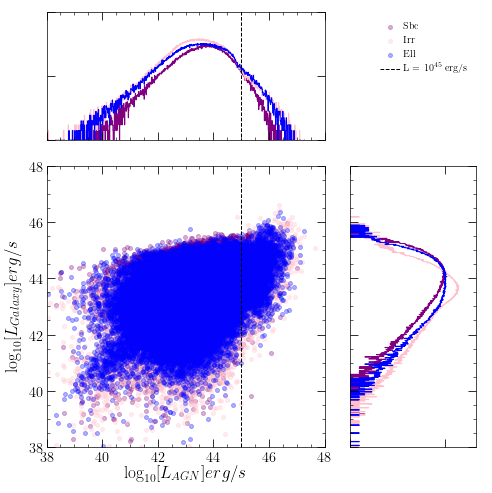

In [27]:
fig = plt.figure(figsize=(24,8))
gs = GridSpec(nrows=3,ncols=9, figure=fig)


ax = fig.add_subplot(gs[1:, 0:2])
ax.scatter(IRS['LAGNerg'],IRS['LSbcergc'],c = 'purple',label = 'Sbc' ,alpha = 0.3)
ax.scatter(IRI['LAGNerg'],IRI['LIrrergc'],c = 'pink',label = 'Irr' ,alpha = 0.3)
ax.scatter(IRE['LAGNerg'],IRE['LEllergc'],c = 'blue',label = 'Ell' ,alpha = 0.3)
ax.vlines(45, -20, 10**4, colors='black', linestyles='dashed', label='L = $10^{45}$ erg/s')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_ylabel(r'$ \log_{10}[L_{Galaxy}] erg/s$')
ax.set_xlabel(r'$ \log_{10}[L_{AGN}] erg/s$')
ax.set_xlim(38, 48)
ax.set_ylim(38,48)
handles, labels = ax.get_legend_handles_labels()

ax = fig.add_subplot(gs[0, 2])
ax.axis('off')
ax.legend(handles=handles, labels=labels)

ax = fig.add_subplot(gs[0, 0:2])
ax.hist(IRS['LAGNerg'], bins=1000, histtype='step', color='purple', density=False, lw=1, label="x", log=True)
ax.hist(IRI['LAGNerg'], bins=1000, histtype='step', color='pink', density=False, lw=1, label="x", log=True)
ax.hist(IRE['LAGNerg'], bins=1000, histtype='step', color='blue', density=False, lw=1, label="x", log=True)
ax.vlines(45, -20, 10**4, colors='black', linestyles='dashed', label='L = $10^{45}$ erg/s')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_xlim(38, 48)
ax.set_ylim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)

ax = fig.add_subplot(gs[1:, 2])
ax.hist(IRS['LSbcergc'], bins=1000,orientation='horizontal', histtype='step', color='purple', density=False, lw=1, label="y", log=True)
ax.hist(IRI['LIrrergc'], bins=1000,orientation='horizontal', histtype='step', color='pink', density=False, lw=1, label="y", log=True)
ax.hist(IRE['LEllergc'], bins=1000,orientation='horizontal', histtype='step', color='blue', density=False, lw=1, label="y", log=True)
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_ylim(38,48)
ax.set_xlim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)



[]

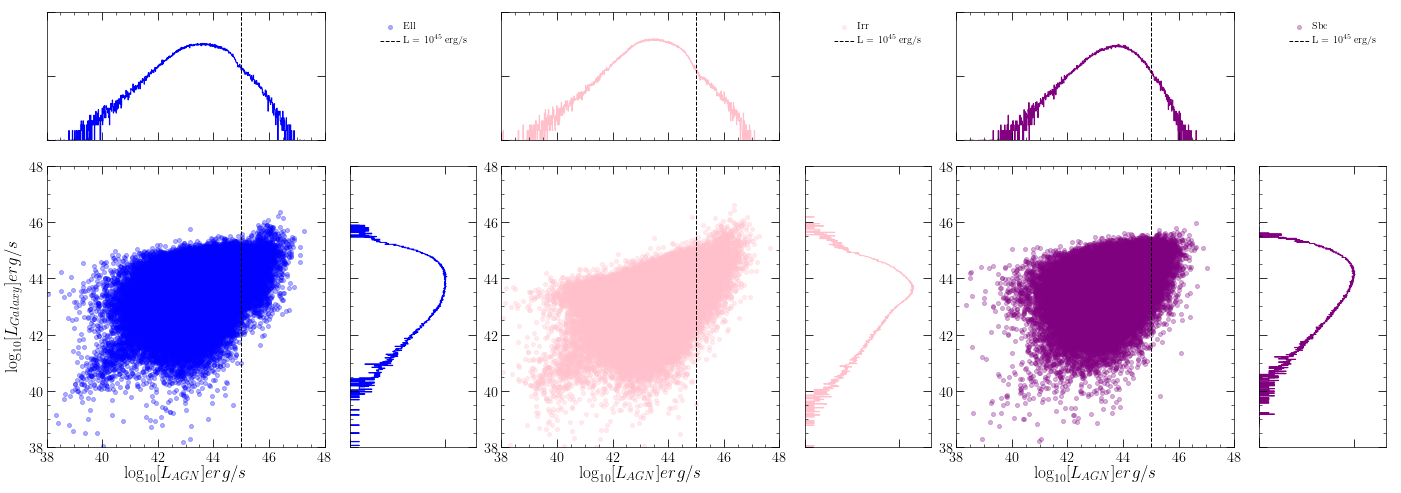

In [28]:
fig = plt.figure(figsize=(24,8))
gs = GridSpec(nrows=3,ncols=9, figure=fig)


ax = fig.add_subplot(gs[1:, 0:2])
#ax.scatter(IRS['LAGNerg'],IRS['LSbcergc'],c = 'purple',label = 'Sbc' ,alpha = 0.3)
#ax.scatter(IRI['LAGNerg'],IRI['LIrrergc'],c = 'pink',label = 'Irr' ,alpha = 0.3)
ax.scatter(IRE['LAGNerg'],IRE['LEllergc'],c = 'blue',label = 'Ell' ,alpha = 0.3)
ax.vlines(45, -20, 10**4, colors='black', linestyles='dashed', label='L = $10^{45}$ erg/s')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_ylabel(r'$ \log_{10}[L_{Galaxy}] erg/s$')
ax.set_xlabel(r'$ \log_{10}[L_{AGN}] erg/s$')
ax.set_xlim(38, 48)
ax.set_ylim(38,48)
handles, labels = ax.get_legend_handles_labels()

ax = fig.add_subplot(gs[0, 2])
ax.axis('off')
ax.legend(handles=handles, labels=labels)

ax = fig.add_subplot(gs[0, 0:2])
#ax.hist(IRS['LAGNerg'], bins=1000, histtype='step', color='purple', density=False, lw=1, label="x", log=True)
#ax.hist(IRI['LAGNerg'], bins=1000, histtype='step', color='pink', density=False, lw=1, label="x", log=True)
ax.hist(IRE['LAGNerg'], bins=1000, histtype='step', color='blue', density=False, lw=1, label="x", log=True)
ax.vlines(45, -20, 10**4, colors='black', linestyles='dashed', label='L = $10^{45}$ erg/s')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_xlim(38, 48)
ax.set_ylim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)

ax = fig.add_subplot(gs[1:, 2])
#ax.hist(IRS['LSbcergc'], bins=1000,orientation='horizontal', histtype='step', color='purple', density=False, lw=1, label="y", log=True)
#ax.hist(IRI['LIrrergc'], bins=1000,orientation='horizontal', histtype='step', color='pink', density=False, lw=1, label="y", log=True)
ax.hist(IRE['LEllergc'], bins=1000,orientation='horizontal', histtype='step', color='blue', density=False, lw=1, label="y", log=True)
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_ylim(38,48)
ax.set_xlim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)


###


ax = fig.add_subplot(gs[1:, 3:5])
#ax.scatter(IRS['LAGNerg'],IRS['LSbcergc'],c = 'purple',label = 'Sbc' ,alpha = 0.3)
ax.scatter(IRI['LAGNerg'],IRI['LIrrergc'],c = 'pink',label = 'Irr' ,alpha = 0.3)
#ax.scatter(IRE['LAGNerg'],IRE['LEllergc'],c = 'blue',label = 'Ell' ,alpha = 0.3)
ax.vlines(45, -20, 10**4, colors='black', linestyles='dashed', label='L = $10^{45}$ erg/s')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
#ax.set_ylabel(r'$ \log_{10}[L_{Galaxy}] erg/s$')
ax.set_xlabel(r'$ \log_{10}[L_{AGN}] erg/s$')
ax.set_xlim(38, 48)
ax.set_ylim(38,48)
handles, labels = ax.get_legend_handles_labels()

ax = fig.add_subplot(gs[0, 5])
ax.axis('off')
ax.legend(handles=handles, labels=labels)

ax = fig.add_subplot(gs[0, 3:5])
#ax.hist(IRS['LAGNerg'], bins=1000, histtype='step', color='purple', density=False, lw=1, label="x", log=True)
ax.hist(IRI['LAGNerg'], bins=1000, histtype='step', color='pink', density=False, lw=1, label="x", log=True)
#ax.hist(IRE['LAGNerg'], bins=1000, histtype='step', color='blue', density=False, lw=1, label="x", log=True)
ax.vlines(45, -20, 10**4, colors='black', linestyles='dashed', label='L = $10^{45}$ erg/s')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_xlim(38, 48)
ax.set_ylim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)

ax = fig.add_subplot(gs[1:, 5])
#ax.hist(IRS['LSbcergc'], bins=1000,orientation='horizontal', histtype='step', color='purple', density=False, lw=1, label="y", log=True)
ax.hist(IRI['LIrrergc'], bins=1000,orientation='horizontal', histtype='step', color='pink', density=False, lw=1, label="y", log=True)
#ax.hist(IRE['LEllergc'], bins=1000,orientation='horizontal', histtype='step', color='blue', density=False, lw=1, label="y", log=True)
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_ylim(38,48)
ax.set_xlim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)

####

ax = fig.add_subplot(gs[1:, 6:8])
ax.scatter(IRS['LAGNerg'],IRS['LSbcergc'],c = 'purple',label = 'Sbc' ,alpha = 0.3)
#ax.scatter(IRI['LAGNerg'],IRI['LIrrergc'],c = 'pink',label = 'Irr' ,alpha = 0.3)
#ax.scatter(IRE['LAGNerg'],IRE['LEllergc'],c = 'blue',label = 'Ell' ,alpha = 0.3)
ax.vlines(45, -20, 10**4, colors='black', linestyles='dashed', label='L = $10^{45}$ erg/s')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
#ax.set_ylabel(r'$ \log_{10}[L_{Galaxy}] erg/s$')
ax.set_xlabel(r'$ \log_{10}[L_{AGN}] erg/s$')
ax.set_xlim(38, 48)
ax.set_ylim(38,48)
handles, labels = ax.get_legend_handles_labels()

ax = fig.add_subplot(gs[0, 8])
ax.axis('off')
ax.legend(handles=handles, labels=labels)

ax = fig.add_subplot(gs[0, 6:8])
ax.hist(IRS['LAGNerg'], bins=1000, histtype='step', color='purple', density=False, lw=1, label="x", log=True)
#ax.hist(IRI['LAGNerg'], bins=1000, histtype='step', color='pink', density=False, lw=1, label="x", log=True)
#ax.hist(IRE['LAGNerg'], bins=1000, histtype='step', color='blue', density=False, lw=1, label="x", log=True)
ax.vlines(45, -20, 10**4, colors='black', linestyles='dashed', label='L = $10^{45}$ erg/s')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_xlim(38, 48)
ax.set_ylim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)

ax = fig.add_subplot(gs[1:, -1])
ax.hist(IRS['LSbcergc'], bins=1000,orientation='horizontal', histtype='step', color='purple', density=False, lw=1, label="y", log=True)
#ax.hist(IRI['LIrrergc'], bins=1000,orientation='horizontal', histtype='step', color='pink', density=False, lw=1, label="y", log=True)
#ax.hist(IRE['LEllergc'], bins=1000,orientation='horizontal', histtype='step', color='blue', density=False, lw=1, label="y", log=True)
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_ylim(38,48)
ax.set_xlim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)



[]

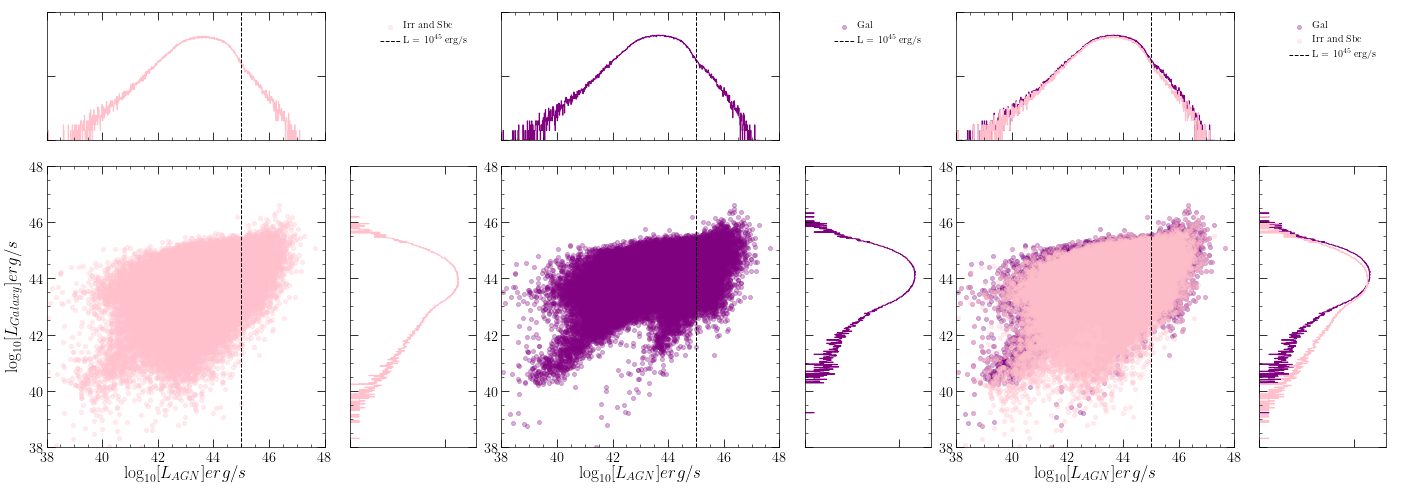

In [29]:
fig = plt.figure(figsize=(24,8))
gs = GridSpec(nrows=3,ncols=9, figure=fig)


ax = fig.add_subplot(gs[1:, 0:2])
#ax.scatter(IRG['LAGNerg'],IRG['LGalerg'],c = 'purple',label = 'Gal' ,alpha = 0.3)
ax.scatter(IRIS['LAGNerg'],IRIS['LIrrSbcerg'],c = 'pink',label = 'Irr and Sbc' ,alpha = 0.3)
ax.vlines(45, -20, 10**4, colors='black', linestyles='dashed', label='L = $10^{45}$ erg/s')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_ylabel(r'$ \log_{10}[L_{Galaxy}] erg/s$')
ax.set_xlabel(r'$ \log_{10}[L_{AGN}] erg/s$')
ax.set_xlim(38, 48)
ax.set_ylim(38,48)
handles, labels = ax.get_legend_handles_labels()

ax = fig.add_subplot(gs[0, 2])
ax.axis('off')
ax.legend(handles=handles, labels=labels)

ax = fig.add_subplot(gs[0, 0:2])
#ax.hist(IRG['LAGNerg'], bins=1000, histtype='step', color='purple', density=False, lw=1, label="x", log=True)
ax.hist(IRIS['LAGNerg'], bins=1000, histtype='step', color='pink', density=False, lw=1, label="x", log=True)
ax.vlines(45, -20, 10**4, colors='black', linestyles='dashed', label='L = $10^{45}$ erg/s')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_xlim(38, 48)
ax.set_ylim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)

ax = fig.add_subplot(gs[1:, 2])
#ax.hist(IRG['LGalerg'], bins=1000,orientation='horizontal', histtype='step', color='purple', density=False, lw=1, label="y", log=True)
ax.hist(IRIS['LIrrSbcerg'], bins=1000,orientation='horizontal', histtype='step', color='pink', density=False, lw=1, label="y", log=True)
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_ylim(38,48)
ax.set_xlim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)


###


ax = fig.add_subplot(gs[1:, 3:5])
ax.scatter(IRG['LAGNerg'],IRG['LGalerg'],c = 'purple',label = 'Gal' ,alpha = 0.3)
#ax.scatter(IRIS['LAGNerg'],IRIS['LIrrSbcerg'],c = 'pink',label = 'Irr and Sbc' ,alpha = 0.3)
ax.vlines(45, -20, 10**4, colors='black', linestyles='dashed', label='L = $10^{45}$ erg/s')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
#ax.set_ylabel(r'$ \log_{10}[L_{Galaxy}] erg/s$')
ax.set_xlabel(r'$ \log_{10}[L_{AGN}] erg/s$')
ax.set_xlim(38, 48)
ax.set_ylim(38,48)
handles, labels = ax.get_legend_handles_labels()

ax = fig.add_subplot(gs[0, 5])
ax.axis('off')
ax.legend(handles=handles, labels=labels)

ax = fig.add_subplot(gs[0, 3:5])
ax.hist(IRG['LAGNerg'], bins=1000, histtype='step', color='purple', density=False, lw=1, label="x", log=True)
#ax.hist(IRIS['LAGNerg'], bins=1000, histtype='step', color='pink', density=False, lw=1, label="x", log=True)
ax.vlines(45, -20, 10**4, colors='black', linestyles='dashed', label='L = $10^{45}$ erg/s')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_xlim(38, 48)
ax.set_ylim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)

ax = fig.add_subplot(gs[1:, 5])
ax.hist(IRG['LGalerg'], bins=1000,orientation='horizontal', histtype='step', color='purple', density=False, lw=1, label="y", log=True)
#ax.hist(IRIS['LIrrSbcerg'], bins=1000,orientation='horizontal', histtype='step', color='pink', density=False, lw=1, label="y", log=True)
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_ylim(38,48)
ax.set_xlim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)


###

ax = fig.add_subplot(gs[1:, 6:8])
ax.scatter(IRG['LAGNerg'],IRG['LGalerg'],c = 'purple',label = 'Gal' ,alpha = 0.3)
ax.scatter(IRIS['LAGNerg'],IRIS['LIrrSbcerg'],c = 'pink',label = 'Irr and Sbc' ,alpha = 0.3)
ax.vlines(45, -20, 10**4, colors='black', linestyles='dashed', label='L = $10^{45}$ erg/s')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
#ax.set_ylabel(r'$ \log_{10}[L_{Galaxy}] erg/s$')
ax.set_xlabel(r'$ \log_{10}[L_{AGN}] erg/s$')
ax.set_xlim(38, 48)
ax.set_ylim(38,48)
handles, labels = ax.get_legend_handles_labels()

ax = fig.add_subplot(gs[0, 8])
ax.axis('off')
ax.legend(handles=handles, labels=labels)

ax = fig.add_subplot(gs[0, 6:8])
ax.hist(IRG['LAGNerg'], bins=1000, histtype='step', color='purple', density=False, lw=1, label="x", log=True)
ax.hist(IRIS['LAGNerg'], bins=1000, histtype='step', color='pink', density=False, lw=1, label="x", log=True)
ax.vlines(45, -20, 10**4, colors='black', linestyles='dashed', label='L = $10^{45}$ erg/s')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_xlim(38, 48)
ax.set_ylim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)

ax = fig.add_subplot(gs[1:, -1])
ax.hist(IRG['LGalerg'], bins=1000,orientation='horizontal', histtype='step', color='purple', density=False, lw=1, label="y", log=True)
ax.hist(IRIS['LIrrSbcerg'], bins=1000,orientation='horizontal', histtype='step', color='pink', density=False, lw=1, label="y", log=True)
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_ylim(38,48)
ax.set_xlim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)

In [30]:
#there are more points in the Lgal than LIrrSbc but the histogram appears otherwise because sometimes the unlogged L is -ve?

In [31]:
#the following are the same as above but rather then cutting each set so as to only take the 0's out for that set
#if any column is 0 it's removed so all come from the same sized sample

[]

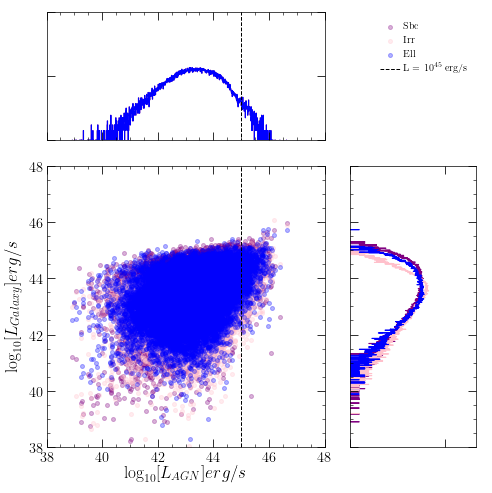

In [32]:
fig = plt.figure(figsize=(24,8))
gs = GridSpec(nrows=3,ncols=9, figure=fig)


ax = fig.add_subplot(gs[1:, 0:2])
ax.scatter(IR['LAGNerg'],IR['LSbcergc'],c = 'purple',label = 'Sbc' ,alpha = 0.3)
ax.scatter(IR['LAGNerg'],IR['LIrrergc'],c = 'pink',label = 'Irr' ,alpha = 0.3)
ax.scatter(IR['LAGNerg'],IR['LEllergc'],c = 'blue',label = 'Ell' ,alpha = 0.3)
ax.vlines(45, -20, 10**4, colors='black', linestyles='dashed', label='L = $10^{45}$ erg/s')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_ylabel(r'$ \log_{10}[L_{Galaxy}] erg/s$')
ax.set_xlabel(r'$ \log_{10}[L_{AGN}] erg/s$')
ax.set_xlim(38, 48)
ax.set_ylim(38,48)
handles, labels = ax.get_legend_handles_labels()

ax = fig.add_subplot(gs[0, 2])
ax.axis('off')
ax.legend(handles=handles, labels=labels)

ax = fig.add_subplot(gs[0, 0:2])
ax.hist(IR['LAGNerg'], bins=1000, histtype='step', color='purple', density=False, lw=1, label="x", log=True)
ax.hist(IR['LAGNerg'], bins=1000, histtype='step', color='pink', density=False, lw=1, label="x", log=True)
ax.hist(IR['LAGNerg'], bins=1000, histtype='step', color='blue', density=False, lw=1, label="x", log=True)
ax.vlines(45, -20, 10**4, colors='black', linestyles='dashed', label='L = $10^{45}$ erg/s')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_xlim(38, 48)
ax.set_ylim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)

ax = fig.add_subplot(gs[1:, 2])
ax.hist(IR['LSbcergc'], bins=1000,orientation='horizontal', histtype='step', color='purple', density=False, lw=1, label="y", log=True)
ax.hist(IR['LIrrergc'], bins=1000,orientation='horizontal', histtype='step', color='pink', density=False, lw=1, label="y", log=True)
ax.hist(IR['LEllergc'], bins=1000,orientation='horizontal', histtype='step', color='blue', density=False, lw=1, label="y", log=True)
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_ylim(38,48)
ax.set_xlim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)



[]

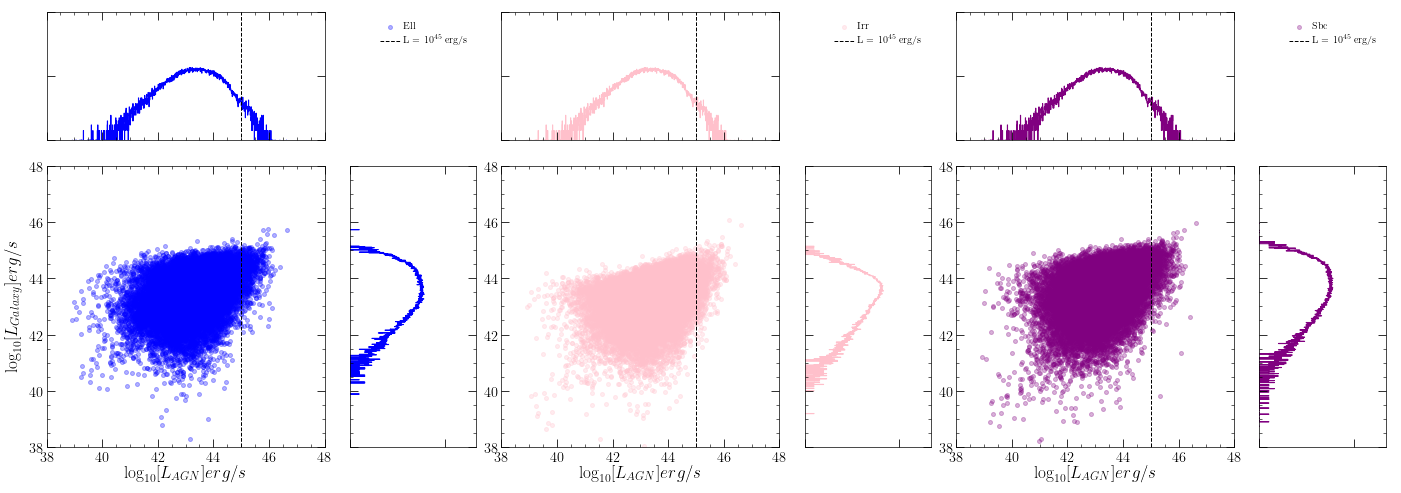

In [33]:
fig = plt.figure(figsize=(24,8))
gs = GridSpec(nrows=3,ncols=9, figure=fig)


ax = fig.add_subplot(gs[1:, 0:2])
#ax.scatter(IRS['LAGNerg'],IRS['LSbcergc'],c = 'purple',label = 'Sbc' ,alpha = 0.3)
#ax.scatter(IRI['LAGNerg'],IRI['LIrrergc'],c = 'pink',label = 'Irr' ,alpha = 0.3)
ax.scatter(IR['LAGNerg'],IR['LEllergc'],c = 'blue',label = 'Ell' ,alpha = 0.3)
ax.vlines(45, -20, 10**4, colors='black', linestyles='dashed', label='L = $10^{45}$ erg/s')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_ylabel(r'$ \log_{10}[L_{Galaxy}] erg/s$')
ax.set_xlabel(r'$ \log_{10}[L_{AGN}] erg/s$')
ax.set_xlim(38, 48)
ax.set_ylim(38,48)
handles, labels = ax.get_legend_handles_labels()

ax = fig.add_subplot(gs[0, 2])
ax.axis('off')
ax.legend(handles=handles, labels=labels)

ax = fig.add_subplot(gs[0, 0:2])
#ax.hist(IRS['LAGNerg'], bins=1000, histtype='step', color='purple', density=False, lw=1, label="x", log=True)
#ax.hist(IRI['LAGNerg'], bins=1000, histtype='step', color='pink', density=False, lw=1, label="x", log=True)
ax.hist(IR['LAGNerg'], bins=1000, histtype='step', color='blue', density=False, lw=1, label="x", log=True)
ax.vlines(45, -20, 10**4, colors='black', linestyles='dashed', label='L = $10^{45}$ erg/s')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_xlim(38, 48)
ax.set_ylim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)

ax = fig.add_subplot(gs[1:, 2])
#ax.hist(IRS['LSbcergc'], bins=1000,orientation='horizontal', histtype='step', color='purple', density=False, lw=1, label="y", log=True)
#ax.hist(IRI['LIrrergc'], bins=1000,orientation='horizontal', histtype='step', color='pink', density=False, lw=1, label="y", log=True)
ax.hist(IR['LEllergc'], bins=1000,orientation='horizontal', histtype='step', color='blue', density=False, lw=1, label="y", log=True)
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_ylim(38,48)
ax.set_xlim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)


###


ax = fig.add_subplot(gs[1:, 3:5])
#ax.scatter(IRS['LAGNerg'],IRS['LSbcergc'],c = 'purple',label = 'Sbc' ,alpha = 0.3)
ax.scatter(IR['LAGNerg'],IR['LIrrergc'],c = 'pink',label = 'Irr' ,alpha = 0.3)
#ax.scatter(IRE['LAGNerg'],IRE['LEllergc'],c = 'blue',label = 'Ell' ,alpha = 0.3)
ax.vlines(45, -20, 10**4, colors='black', linestyles='dashed', label='L = $10^{45}$ erg/s')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
#ax.set_ylabel(r'$ \log_{10}[L_{Galaxy}] erg/s$')
ax.set_xlabel(r'$ \log_{10}[L_{AGN}] erg/s$')
ax.set_xlim(38, 48)
ax.set_ylim(38,48)
handles, labels = ax.get_legend_handles_labels()

ax = fig.add_subplot(gs[0, 5])
ax.axis('off')
ax.legend(handles=handles, labels=labels)

ax = fig.add_subplot(gs[0, 3:5])
#ax.hist(IRS['LAGNerg'], bins=1000, histtype='step', color='purple', density=False, lw=1, label="x", log=True)
ax.hist(IR['LAGNerg'], bins=1000, histtype='step', color='pink', density=False, lw=1, label="x", log=True)
#ax.hist(IRE['LAGNerg'], bins=1000, histtype='step', color='blue', density=False, lw=1, label="x", log=True)
ax.vlines(45, -20, 10**4, colors='black', linestyles='dashed', label='L = $10^{45}$ erg/s')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_xlim(38, 48)
ax.set_ylim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)

ax = fig.add_subplot(gs[1:, 5])
#ax.hist(IRS['LSbcergc'], bins=1000,orientation='horizontal', histtype='step', color='purple', density=False, lw=1, label="y", log=True)
ax.hist(IR['LIrrergc'], bins=1000,orientation='horizontal', histtype='step', color='pink', density=False, lw=1, label="y", log=True)
#ax.hist(IRE['LEllergc'], bins=1000,orientation='horizontal', histtype='step', color='blue', density=False, lw=1, label="y", log=True)
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_ylim(38,48)
ax.set_xlim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)

####

ax = fig.add_subplot(gs[1:, 6:8])
ax.scatter(IR['LAGNerg'],IR['LSbcergc'],c = 'purple',label = 'Sbc' ,alpha = 0.3)
#ax.scatter(IRI['LAGNerg'],IRI['LIrrergc'],c = 'pink',label = 'Irr' ,alpha = 0.3)
#ax.scatter(IRE['LAGNerg'],IRE['LEllergc'],c = 'blue',label = 'Ell' ,alpha = 0.3)
ax.vlines(45, -20, 10**4, colors='black', linestyles='dashed', label='L = $10^{45}$ erg/s')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
#ax.set_ylabel(r'$ \log_{10}[L_{Galaxy}] erg/s$')
ax.set_xlabel(r'$ \log_{10}[L_{AGN}] erg/s$')
ax.set_xlim(38, 48)
ax.set_ylim(38,48)
handles, labels = ax.get_legend_handles_labels()

ax = fig.add_subplot(gs[0, 8])
ax.axis('off')
ax.legend(handles=handles, labels=labels)

ax = fig.add_subplot(gs[0, 6:8])
ax.hist(IR['LAGNerg'], bins=1000, histtype='step', color='purple', density=False, lw=1, label="x", log=True)
#ax.hist(IRI['LAGNerg'], bins=1000, histtype='step', color='pink', density=False, lw=1, label="x", log=True)
#ax.hist(IRE['LAGNerg'], bins=1000, histtype='step', color='blue', density=False, lw=1, label="x", log=True)
ax.vlines(45, -20, 10**4, colors='black', linestyles='dashed', label='L = $10^{45}$ erg/s')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_xlim(38, 48)
ax.set_ylim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)

ax = fig.add_subplot(gs[1:, -1])
ax.hist(IR['LSbcergc'], bins=1000,orientation='horizontal', histtype='step', color='purple', density=False, lw=1, label="y", log=True)
#ax.hist(IRI['LIrrergc'], bins=1000,orientation='horizontal', histtype='step', color='pink', density=False, lw=1, label="y", log=True)
#ax.hist(IRE['LEllergc'], bins=1000,orientation='horizontal', histtype='step', color='blue', density=False, lw=1, label="y", log=True)
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_ylim(38,48)
ax.set_xlim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)



[]

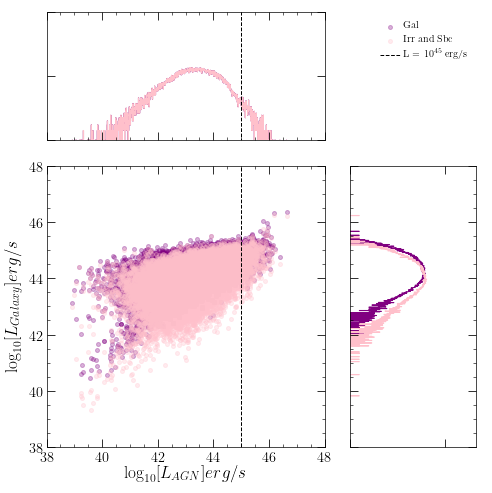

In [34]:
fig = plt.figure(figsize=(24,8))
gs = GridSpec(nrows=3,ncols=9, figure=fig)


ax = fig.add_subplot(gs[1:, 0:2])
ax.scatter(IR['LAGNerg'],IR['LGalerg'],c = 'purple',label = 'Gal' ,alpha = 0.3)
ax.scatter(IR['LAGNerg'],IR['LIrrSbcerg'],c = 'pink',label = 'Irr and Sbc' ,alpha = 0.3)
ax.vlines(45, -20, 10**4, colors='black', linestyles='dashed', label='L = $10^{45}$ erg/s')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_ylabel(r'$ \log_{10}[L_{Galaxy}] erg/s$')
ax.set_xlabel(r'$ \log_{10}[L_{AGN}] erg/s$')
ax.set_xlim(38, 48)
ax.set_ylim(38,48)
handles, labels = ax.get_legend_handles_labels()

ax = fig.add_subplot(gs[0, 2])
ax.axis('off')
ax.legend(handles=handles, labels=labels)

ax = fig.add_subplot(gs[0, 0:2])
ax.hist(IR['LAGNerg'], bins=1000, histtype='step', color='purple', density=False, lw=1, label="x", log=True)
ax.hist(IR['LAGNerg'], bins=1000, histtype='step', color='pink', density=False, lw=1, label="x", log=True)
ax.vlines(45, -20, 10**4, colors='black', linestyles='dashed', label='L = $10^{45}$ erg/s')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_xlim(38, 48)
ax.set_ylim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)

ax = fig.add_subplot(gs[1:, 2])
ax.hist(IR['LGalerg'], bins=1000,orientation='horizontal', histtype='step', color='purple', density=False, lw=1, label="y", log=True)
ax.hist(IR['LIrrSbcerg'], bins=1000,orientation='horizontal', histtype='step', color='pink', density=False, lw=1, label="y", log=True)
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_ylim(38,48)
ax.set_xlim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)

[]

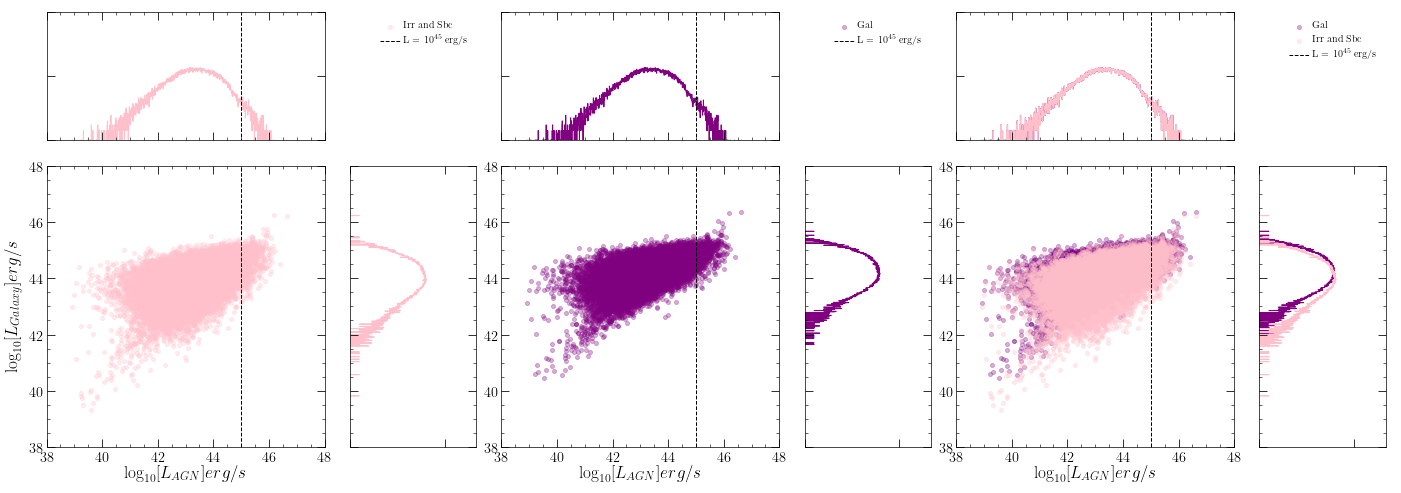

In [35]:
fig = plt.figure(figsize=(24,8))
gs = GridSpec(nrows=3,ncols=9, figure=fig)


ax = fig.add_subplot(gs[1:, 0:2])
#ax.scatter(IRG['LAGNerg'],IRG['LGalerg'],c = 'purple',label = 'Gal' ,alpha = 0.3)
ax.scatter(IR['LAGNerg'],IR['LIrrSbcerg'],c = 'pink',label = 'Irr and Sbc' ,alpha = 0.3)
ax.vlines(45, -20, 10**4, colors='black', linestyles='dashed', label='L = $10^{45}$ erg/s')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_ylabel(r'$ \log_{10}[L_{Galaxy}] erg/s$')
ax.set_xlabel(r'$ \log_{10}[L_{AGN}] erg/s$')
ax.set_xlim(38, 48)
ax.set_ylim(38,48)
handles, labels = ax.get_legend_handles_labels()

ax = fig.add_subplot(gs[0, 2])
ax.axis('off')
ax.legend(handles=handles, labels=labels)

ax = fig.add_subplot(gs[0, 0:2])
#ax.hist(IRG['LAGNerg'], bins=1000, histtype='step', color='purple', density=False, lw=1, label="x", log=True)
ax.hist(IR['LAGNerg'], bins=1000, histtype='step', color='pink', density=False, lw=1, label="x", log=True)
ax.vlines(45, -20, 10**4, colors='black', linestyles='dashed', label='L = $10^{45}$ erg/s')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_xlim(38, 48)
ax.set_ylim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)

ax = fig.add_subplot(gs[1:, 2])
#ax.hist(IRG['LGalerg'], bins=1000,orientation='horizontal', histtype='step', color='purple', density=False, lw=1, label="y", log=True)
ax.hist(IR['LIrrSbcerg'], bins=1000,orientation='horizontal', histtype='step', color='pink', density=False, lw=1, label="y", log=True)
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_ylim(38,48)
ax.set_xlim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)


###


ax = fig.add_subplot(gs[1:, 3:5])
ax.scatter(IR['LAGNerg'],IR['LGalerg'],c = 'purple',label = 'Gal' ,alpha = 0.3)
#ax.scatter(IRIS['LAGNerg'],IRIS['LIrrSbcerg'],c = 'pink',label = 'Irr and Sbc' ,alpha = 0.3)
ax.vlines(45, -20, 10**4, colors='black', linestyles='dashed', label='L = $10^{45}$ erg/s')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
#ax.set_ylabel(r'$ \log_{10}[L_{Galaxy}] erg/s$')
ax.set_xlabel(r'$ \log_{10}[L_{AGN}] erg/s$')
ax.set_xlim(38, 48)
ax.set_ylim(38,48)
handles, labels = ax.get_legend_handles_labels()

ax = fig.add_subplot(gs[0, 5])
ax.axis('off')
ax.legend(handles=handles, labels=labels)

ax = fig.add_subplot(gs[0, 3:5])
ax.hist(IR['LAGNerg'], bins=1000, histtype='step', color='purple', density=False, lw=1, label="x", log=True)
#ax.hist(IRIS['LAGNerg'], bins=1000, histtype='step', color='pink', density=False, lw=1, label="x", log=True)
ax.vlines(45, -20, 10**4, colors='black', linestyles='dashed', label='L = $10^{45}$ erg/s')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_xlim(38, 48)
ax.set_ylim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)

ax = fig.add_subplot(gs[1:, 5])
ax.hist(IR['LGalerg'], bins=1000,orientation='horizontal', histtype='step', color='purple', density=False, lw=1, label="y", log=True)
#ax.hist(IRIS['LIrrSbcerg'], bins=1000,orientation='horizontal', histtype='step', color='pink', density=False, lw=1, label="y", log=True)
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_ylim(38,48)
ax.set_xlim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)


###

ax = fig.add_subplot(gs[1:, 6:8])
ax.scatter(IR['LAGNerg'],IR['LGalerg'],c = 'purple',label = 'Gal' ,alpha = 0.3)
ax.scatter(IR['LAGNerg'],IR['LIrrSbcerg'],c = 'pink',label = 'Irr and Sbc' ,alpha = 0.3)
ax.vlines(45, -20, 10**4, colors='black', linestyles='dashed', label='L = $10^{45}$ erg/s')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
#ax.set_ylabel(r'$ \log_{10}[L_{Galaxy}] erg/s$')
ax.set_xlabel(r'$ \log_{10}[L_{AGN}] erg/s$')
ax.set_xlim(38, 48)
ax.set_ylim(38,48)
handles, labels = ax.get_legend_handles_labels()

ax = fig.add_subplot(gs[0, 8])
ax.axis('off')
ax.legend(handles=handles, labels=labels)

ax = fig.add_subplot(gs[0, 6:8])
ax.hist(IR['LAGNerg'], bins=1000, histtype='step', color='purple', density=False, lw=1, label="x", log=True)
ax.hist(IR['LAGNerg'], bins=1000, histtype='step', color='pink', density=False, lw=1, label="x", log=True)
ax.vlines(45, -20, 10**4, colors='black', linestyles='dashed', label='L = $10^{45}$ erg/s')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_xlim(38, 48)
ax.set_ylim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)

ax = fig.add_subplot(gs[1:, -1])
ax.hist(IR['LGalerg'], bins=1000,orientation='horizontal', histtype='step', color='purple', density=False, lw=1, label="y", log=True)
ax.hist(IR['LIrrSbcerg'], bins=1000,orientation='horizontal', histtype='step', color='pink', density=False, lw=1, label="y", log=True)
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_ylim(38,48)
ax.set_xlim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)

In [36]:
#Type 1 and Type 2 split

[]

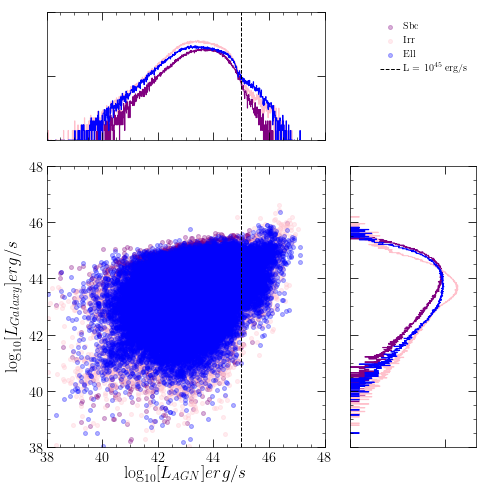

In [37]:
fig = plt.figure(figsize=(24,8))
gs = GridSpec(nrows=3,ncols=9, figure=fig)


ax = fig.add_subplot(gs[1:, 0:2])
ax.scatter(T1IRS['LAGNerg'],T1IRS['LSbcergc'],c = 'purple',label = 'Sbc' ,alpha = 0.3)
ax.scatter(T1IRI['LAGNerg'],T1IRI['LIrrergc'],c = 'pink',label = 'Irr' ,alpha = 0.3)
ax.scatter(T1IRE['LAGNerg'],T1IRE['LEllergc'],c = 'blue',label = 'Ell' ,alpha = 0.3)
ax.vlines(45, -20, 10**4, colors='black', linestyles='dashed', label='L = $10^{45}$ erg/s')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_ylabel(r'$ \log_{10}[L_{Galaxy}] erg/s$')
ax.set_xlabel(r'$ \log_{10}[L_{AGN}] erg/s$')
ax.set_xlim(38, 48)
ax.set_ylim(38,48)
handles, labels = ax.get_legend_handles_labels()

ax = fig.add_subplot(gs[0, 2])
ax.axis('off')
ax.legend(handles=handles, labels=labels)

ax = fig.add_subplot(gs[0, 0:2])
ax.hist(T1IRS['LAGNerg'], bins=1000, histtype='step', color='purple', density=False, lw=1, label="x", log=True)
ax.hist(T1IRI['LAGNerg'], bins=1000, histtype='step', color='pink', density=False, lw=1, label="x", log=True)
ax.hist(T1IRE['LAGNerg'], bins=1000, histtype='step', color='blue', density=False, lw=1, label="x", log=True)
ax.vlines(45, -20, 10**4, colors='black', linestyles='dashed', label='L = $10^{45}$ erg/s')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_xlim(38, 48)
ax.set_ylim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)

ax = fig.add_subplot(gs[1:, 2])
ax.hist(T1IRS['LSbcergc'], bins=1000,orientation='horizontal', histtype='step', color='purple', density=False, lw=1, label="y", log=True)
ax.hist(T1IRI['LIrrergc'], bins=1000,orientation='horizontal', histtype='step', color='pink', density=False, lw=1, label="y", log=True)
ax.hist(T1IRE['LEllergc'], bins=1000,orientation='horizontal', histtype='step', color='blue', density=False, lw=1, label="y", log=True)
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_ylim(38,48)
ax.set_xlim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)



[]

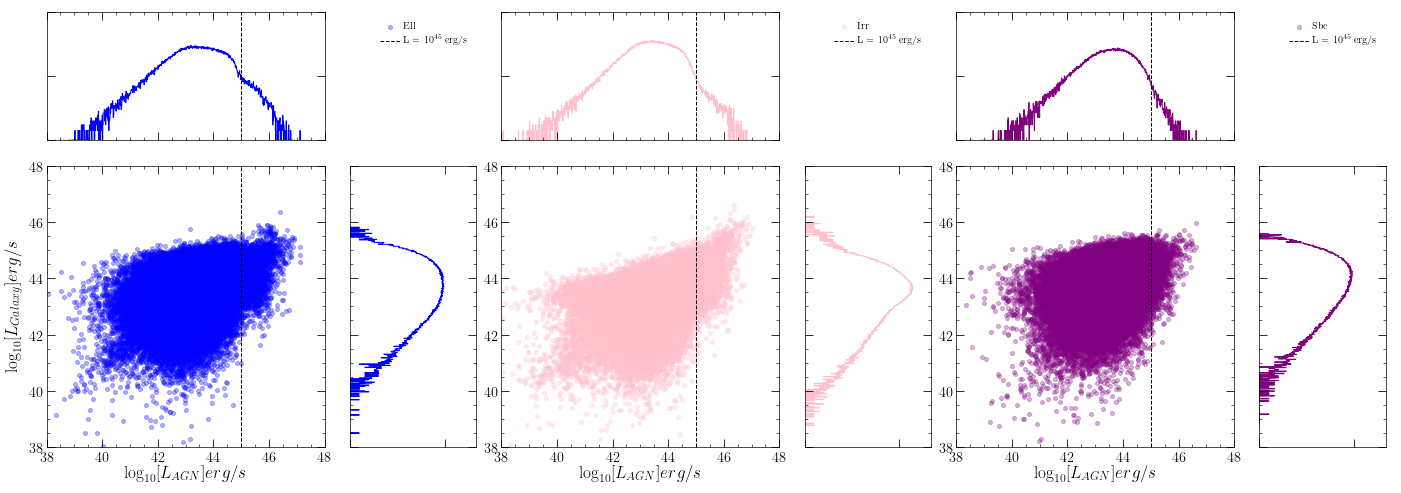

In [38]:
fig = plt.figure(figsize=(24,8))
gs = GridSpec(nrows=3,ncols=9, figure=fig)


ax = fig.add_subplot(gs[1:, 0:2])
#ax.scatter(IRS['LAGNerg'],IRS['LSbcergc'],c = 'purple',label = 'Sbc' ,alpha = 0.3)
#ax.scatter(IRI['LAGNerg'],IRI['LIrrergc'],c = 'pink',label = 'Irr' ,alpha = 0.3)
ax.scatter(T1IRE['LAGNerg'],T1IRE['LEllergc'],c = 'blue',label = 'Ell' ,alpha = 0.3)
ax.vlines(45, -20, 10**4, colors='black', linestyles='dashed', label='L = $10^{45}$ erg/s')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_ylabel(r'$ \log_{10}[L_{Galaxy}] erg/s$')
ax.set_xlabel(r'$ \log_{10}[L_{AGN}] erg/s$')
ax.set_xlim(38, 48)
ax.set_ylim(38,48)
handles, labels = ax.get_legend_handles_labels()

ax = fig.add_subplot(gs[0, 2])
ax.axis('off')
ax.legend(handles=handles, labels=labels)

ax = fig.add_subplot(gs[0, 0:2])
#ax.hist(IRS['LAGNerg'], bins=1000, histtype='step', color='purple', density=False, lw=1, label="x", log=True)
#ax.hist(IRI['LAGNerg'], bins=1000, histtype='step', color='pink', density=False, lw=1, label="x", log=True)
ax.hist(T1IRE['LAGNerg'], bins=1000, histtype='step', color='blue', density=False, lw=1, label="x", log=True)
ax.vlines(45, -20, 10**4, colors='black', linestyles='dashed', label='L = $10^{45}$ erg/s')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_xlim(38, 48)
ax.set_ylim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)

ax = fig.add_subplot(gs[1:, 2])
#ax.hist(IRS['LSbcergc'], bins=1000,orientation='horizontal', histtype='step', color='purple', density=False, lw=1, label="y", log=True)
#ax.hist(IRI['LIrrergc'], bins=1000,orientation='horizontal', histtype='step', color='pink', density=False, lw=1, label="y", log=True)
ax.hist(T1IRE['LEllergc'], bins=1000,orientation='horizontal', histtype='step', color='blue', density=False, lw=1, label="y", log=True)
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_ylim(38,48)
ax.set_xlim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)


###


ax = fig.add_subplot(gs[1:, 3:5])
#ax.scatter(IRS['LAGNerg'],IRS['LSbcergc'],c = 'purple',label = 'Sbc' ,alpha = 0.3)
ax.scatter(T1IRI['LAGNerg'],T1IRI['LIrrergc'],c = 'pink',label = 'Irr' ,alpha = 0.3)
#ax.scatter(IRE['LAGNerg'],IRE['LEllergc'],c = 'blue',label = 'Ell' ,alpha = 0.3)
ax.vlines(45, -20, 10**4, colors='black', linestyles='dashed', label='L = $10^{45}$ erg/s')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
#ax.set_ylabel(r'$ \log_{10}[L_{Galaxy}] erg/s$')
ax.set_xlabel(r'$ \log_{10}[L_{AGN}] erg/s$')
ax.set_xlim(38, 48)
ax.set_ylim(38,48)
handles, labels = ax.get_legend_handles_labels()

ax = fig.add_subplot(gs[0, 5])
ax.axis('off')
ax.legend(handles=handles, labels=labels)

ax = fig.add_subplot(gs[0, 3:5])
#ax.hist(IRS['LAGNerg'], bins=1000, histtype='step', color='purple', density=False, lw=1, label="x", log=True)
ax.hist(T1IRI['LAGNerg'], bins=1000, histtype='step', color='pink', density=False, lw=1, label="x", log=True)
#ax.hist(IRE['LAGNerg'], bins=1000, histtype='step', color='blue', density=False, lw=1, label="x", log=True)
ax.vlines(45, -20, 10**4, colors='black', linestyles='dashed', label='L = $10^{45}$ erg/s')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_xlim(38, 48)
ax.set_ylim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)

ax = fig.add_subplot(gs[1:, 5])
#ax.hist(IRS['LSbcergc'], bins=1000,orientation='horizontal', histtype='step', color='purple', density=False, lw=1, label="y", log=True)
ax.hist(T1IRI['LIrrergc'], bins=1000,orientation='horizontal', histtype='step', color='pink', density=False, lw=1, label="y", log=True)
#ax.hist(IRE['LEllergc'], bins=1000,orientation='horizontal', histtype='step', color='blue', density=False, lw=1, label="y", log=True)
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_ylim(38,48)
ax.set_xlim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)

####

ax = fig.add_subplot(gs[1:, 6:8])
ax.scatter(T1IRS['LAGNerg'],T1IRS['LSbcergc'],c = 'purple',label = 'Sbc' ,alpha = 0.3)
#ax.scatter(IRI['LAGNerg'],IRI['LIrrergc'],c = 'pink',label = 'Irr' ,alpha = 0.3)
#ax.scatter(IRE['LAGNerg'],IRE['LEllergc'],c = 'blue',label = 'Ell' ,alpha = 0.3)
ax.vlines(45, -20, 10**4, colors='black', linestyles='dashed', label='L = $10^{45}$ erg/s')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
#ax.set_ylabel(r'$ \log_{10}[L_{Galaxy}] erg/s$')
ax.set_xlabel(r'$ \log_{10}[L_{AGN}] erg/s$')
ax.set_xlim(38, 48)
ax.set_ylim(38,48)
handles, labels = ax.get_legend_handles_labels()

ax = fig.add_subplot(gs[0, 8])
ax.axis('off')
ax.legend(handles=handles, labels=labels)

ax = fig.add_subplot(gs[0, 6:8])
ax.hist(T1IRS['LAGNerg'], bins=1000, histtype='step', color='purple', density=False, lw=1, label="x", log=True)
#ax.hist(IRI['LAGNerg'], bins=1000, histtype='step', color='pink', density=False, lw=1, label="x", log=True)
#ax.hist(IRE['LAGNerg'], bins=1000, histtype='step', color='blue', density=False, lw=1, label="x", log=True)
ax.vlines(45, -20, 10**4, colors='black', linestyles='dashed', label='L = $10^{45}$ erg/s')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_xlim(38, 48)
ax.set_ylim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)

ax = fig.add_subplot(gs[1:, -1])
ax.hist(T1IRS['LSbcergc'], bins=1000,orientation='horizontal', histtype='step', color='purple', density=False, lw=1, label="y", log=True)
#ax.hist(IRI['LIrrergc'], bins=1000,orientation='horizontal', histtype='step', color='pink', density=False, lw=1, label="y", log=True)
#ax.hist(IRE['LEllergc'], bins=1000,orientation='horizontal', histtype='step', color='blue', density=False, lw=1, label="y", log=True)
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_ylim(38,48)
ax.set_xlim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)

[]

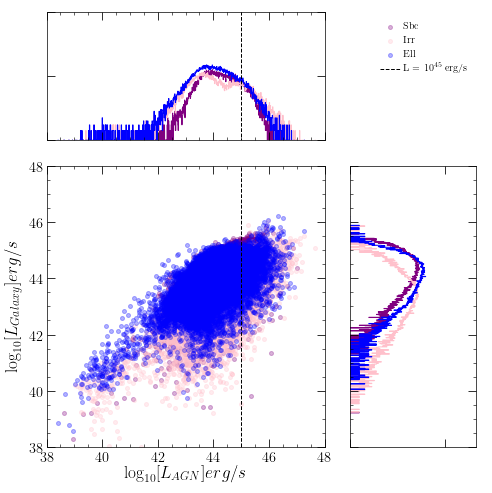

In [39]:
fig = plt.figure(figsize=(24,8))
gs = GridSpec(nrows=3,ncols=9, figure=fig)


ax = fig.add_subplot(gs[1:, 0:2])
ax.scatter(T2IRS['LAGNerg'],T2IRS['LSbcergc'],c = 'purple',label = 'Sbc' ,alpha = 0.3)
ax.scatter(T2IRI['LAGNerg'],T2IRI['LIrrergc'],c = 'pink',label = 'Irr' ,alpha = 0.3)
ax.scatter(T2IRE['LAGNerg'],T2IRE['LEllergc'],c = 'blue',label = 'Ell' ,alpha = 0.3)
ax.vlines(45, -20, 10**4, colors='black', linestyles='dashed', label='L = $10^{45}$ erg/s')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_ylabel(r'$ \log_{10}[L_{Galaxy}] erg/s$')
ax.set_xlabel(r'$ \log_{10}[L_{AGN}] erg/s$')
ax.set_xlim(38, 48)
ax.set_ylim(38,48)
handles, labels = ax.get_legend_handles_labels()

ax = fig.add_subplot(gs[0, 2])
ax.axis('off')
ax.legend(handles=handles, labels=labels)

ax = fig.add_subplot(gs[0, 0:2])
ax.hist(T2IRS['LAGNerg'], bins=1000, histtype='step', color='purple', density=False, lw=1, label="x", log=True)
ax.hist(T2IRI['LAGNerg'], bins=1000, histtype='step', color='pink', density=False, lw=1, label="x", log=True)
ax.hist(T2IRE['LAGNerg'], bins=1000, histtype='step', color='blue', density=False, lw=1, label="x", log=True)
ax.vlines(45, -20, 10**4, colors='black', linestyles='dashed', label='L = $10^{45}$ erg/s')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_xlim(38, 48)
ax.set_ylim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)

ax = fig.add_subplot(gs[1:, 2])
ax.hist(T2IRS['LSbcergc'], bins=1000,orientation='horizontal', histtype='step', color='purple', density=False, lw=1, label="y", log=True)
ax.hist(T2IRI['LIrrergc'], bins=1000,orientation='horizontal', histtype='step', color='pink', density=False, lw=1, label="y", log=True)
ax.hist(T2IRE['LEllergc'], bins=1000,orientation='horizontal', histtype='step', color='blue', density=False, lw=1, label="y", log=True)
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_ylim(38,48)
ax.set_xlim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)



[]

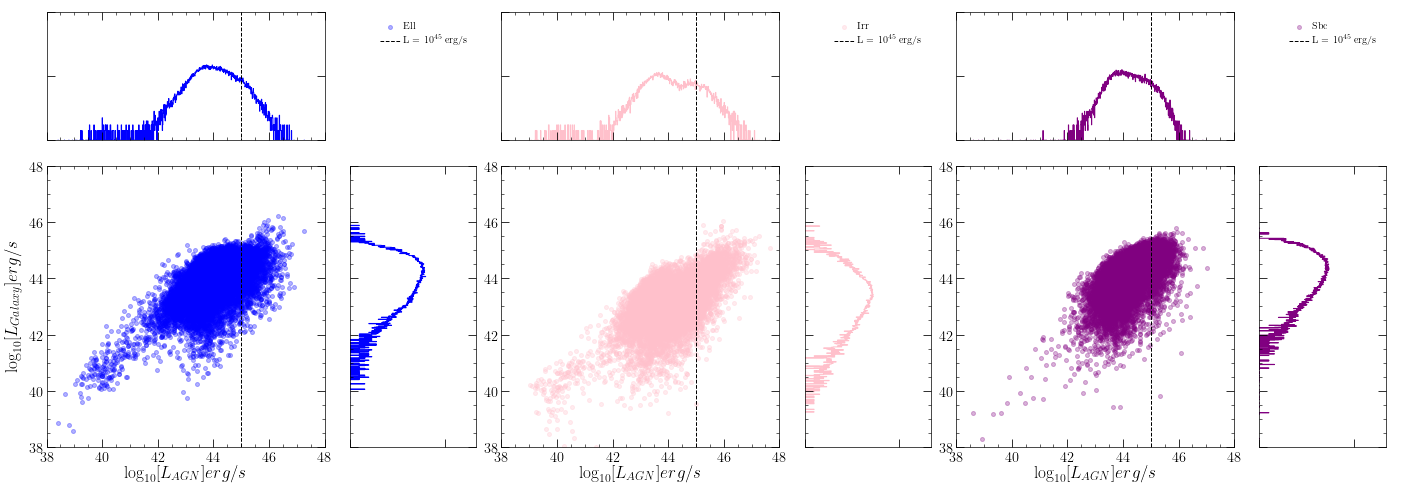

In [40]:
fig = plt.figure(figsize=(24,8))
gs = GridSpec(nrows=3,ncols=9, figure=fig)


ax = fig.add_subplot(gs[1:, 0:2])
#ax.scatter(IRS['LAGNerg'],IRS['LSbcergc'],c = 'purple',label = 'Sbc' ,alpha = 0.3)
#ax.scatter(IRI['LAGNerg'],IRI['LIrrergc'],c = 'pink',label = 'Irr' ,alpha = 0.3)
ax.scatter(T2IRE['LAGNerg'],T2IRE['LEllergc'],c = 'blue',label = 'Ell' ,alpha = 0.3)
ax.vlines(45, -20, 10**4, colors='black', linestyles='dashed', label='L = $10^{45}$ erg/s')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_ylabel(r'$ \log_{10}[L_{Galaxy}] erg/s$')
ax.set_xlabel(r'$ \log_{10}[L_{AGN}] erg/s$')
ax.set_xlim(38, 48)
ax.set_ylim(38,48)
handles, labels = ax.get_legend_handles_labels()

ax = fig.add_subplot(gs[0, 2])
ax.axis('off')
ax.legend(handles=handles, labels=labels)

ax = fig.add_subplot(gs[0, 0:2])
#ax.hist(IRS['LAGNerg'], bins=1000, histtype='step', color='purple', density=False, lw=1, label="x", log=True)
#ax.hist(IRI['LAGNerg'], bins=1000, histtype='step', color='pink', density=False, lw=1, label="x", log=True)
ax.hist(T2IRE['LAGNerg'], bins=1000, histtype='step', color='blue', density=False, lw=1, label="x", log=True)
ax.vlines(45, -20, 10**4, colors='black', linestyles='dashed', label='L = $10^{45}$ erg/s')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_xlim(38, 48)
ax.set_ylim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)

ax = fig.add_subplot(gs[1:, 2])
#ax.hist(IRS['LSbcergc'], bins=1000,orientation='horizontal', histtype='step', color='purple', density=False, lw=1, label="y", log=True)
#ax.hist(IRI['LIrrergc'], bins=1000,orientation='horizontal', histtype='step', color='pink', density=False, lw=1, label="y", log=True)
ax.hist(T2IRE['LEllergc'], bins=1000,orientation='horizontal', histtype='step', color='blue', density=False, lw=1, label="y", log=True)
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_ylim(38,48)
ax.set_xlim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)


###


ax = fig.add_subplot(gs[1:, 3:5])
#ax.scatter(IRS['LAGNerg'],IRS['LSbcergc'],c = 'purple',label = 'Sbc' ,alpha = 0.3)
ax.scatter(T2IRI['LAGNerg'],T2IRI['LIrrergc'],c = 'pink',label = 'Irr' ,alpha = 0.3)
#ax.scatter(IRE['LAGNerg'],IRE['LEllergc'],c = 'blue',label = 'Ell' ,alpha = 0.3)
ax.vlines(45, -20, 10**4, colors='black', linestyles='dashed', label='L = $10^{45}$ erg/s')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
#ax.set_ylabel(r'$ \log_{10}[L_{Galaxy}] erg/s$')
ax.set_xlabel(r'$ \log_{10}[L_{AGN}] erg/s$')
ax.set_xlim(38, 48)
ax.set_ylim(38,48)
handles, labels = ax.get_legend_handles_labels()

ax = fig.add_subplot(gs[0, 5])
ax.axis('off')
ax.legend(handles=handles, labels=labels)

ax = fig.add_subplot(gs[0, 3:5])
#ax.hist(IRS['LAGNerg'], bins=1000, histtype='step', color='purple', density=False, lw=1, label="x", log=True)
ax.hist(T2IRI['LAGNerg'], bins=1000, histtype='step', color='pink', density=False, lw=1, label="x", log=True)
#ax.hist(IRE['LAGNerg'], bins=1000, histtype='step', color='blue', density=False, lw=1, label="x", log=True)
ax.vlines(45, -20, 10**4, colors='black', linestyles='dashed', label='L = $10^{45}$ erg/s')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_xlim(38, 48)
ax.set_ylim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)

ax = fig.add_subplot(gs[1:, 5])
#ax.hist(IRS['LSbcergc'], bins=1000,orientation='horizontal', histtype='step', color='purple', density=False, lw=1, label="y", log=True)
ax.hist(T2IRI['LIrrergc'], bins=1000,orientation='horizontal', histtype='step', color='pink', density=False, lw=1, label="y", log=True)
#ax.hist(IRE['LEllergc'], bins=1000,orientation='horizontal', histtype='step', color='blue', density=False, lw=1, label="y", log=True)
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_ylim(38,48)
ax.set_xlim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)

####

ax = fig.add_subplot(gs[1:, 6:8])
ax.scatter(T2IRS['LAGNerg'],T2IRS['LSbcergc'],c = 'purple',label = 'Sbc' ,alpha = 0.3)
#ax.scatter(IRI['LAGNerg'],IRI['LIrrergc'],c = 'pink',label = 'Irr' ,alpha = 0.3)
#ax.scatter(IRE['LAGNerg'],IRE['LEllergc'],c = 'blue',label = 'Ell' ,alpha = 0.3)
ax.vlines(45, -20, 10**4, colors='black', linestyles='dashed', label='L = $10^{45}$ erg/s')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
#ax.set_ylabel(r'$ \log_{10}[L_{Galaxy}] erg/s$')
ax.set_xlabel(r'$ \log_{10}[L_{AGN}] erg/s$')
ax.set_xlim(38, 48)
ax.set_ylim(38,48)
handles, labels = ax.get_legend_handles_labels()

ax = fig.add_subplot(gs[0, 8])
ax.axis('off')
ax.legend(handles=handles, labels=labels)

ax = fig.add_subplot(gs[0, 6:8])
ax.hist(T2IRS['LAGNerg'], bins=1000, histtype='step', color='purple', density=False, lw=1, label="x", log=True)
#ax.hist(IRI['LAGNerg'], bins=1000, histtype='step', color='pink', density=False, lw=1, label="x", log=True)
#ax.hist(IRE['LAGNerg'], bins=1000, histtype='step', color='blue', density=False, lw=1, label="x", log=True)
ax.vlines(45, -20, 10**4, colors='black', linestyles='dashed', label='L = $10^{45}$ erg/s')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_xlim(38, 48)
ax.set_ylim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)

ax = fig.add_subplot(gs[1:, -1])
ax.hist(T2IRS['LSbcergc'], bins=1000,orientation='horizontal', histtype='step', color='purple', density=False, lw=1, label="y", log=True)
#ax.hist(IRI['LIrrergc'], bins=1000,orientation='horizontal', histtype='step', color='pink', density=False, lw=1, label="y", log=True)
#ax.hist(IRE['LEllergc'], bins=1000,orientation='horizontal', histtype='step', color='blue', density=False, lw=1, label="y", log=True)
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_ylim(38,48)
ax.set_xlim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)

[]

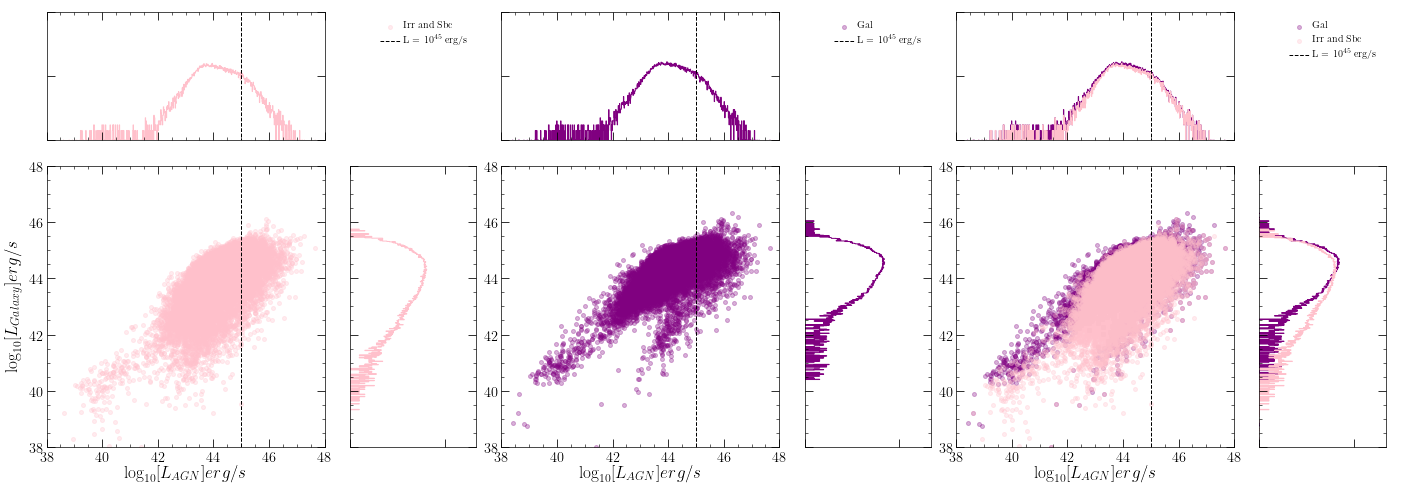

In [41]:
fig = plt.figure(figsize=(24,8))
gs = GridSpec(nrows=3,ncols=9, figure=fig)


ax = fig.add_subplot(gs[1:, 0:2])
#ax.scatter(IRG['LAGNerg'],IRG['LGalerg'],c = 'purple',label = 'Gal' ,alpha = 0.3)
ax.scatter(T2IRIS['LAGNerg'],T2IRIS['LIrrSbcerg'],c = 'pink',label = 'Irr and Sbc' ,alpha = 0.3)
ax.vlines(45, -20, 10**4, colors='black', linestyles='dashed', label='L = $10^{45}$ erg/s')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_ylabel(r'$ \log_{10}[L_{Galaxy}] erg/s$')
ax.set_xlabel(r'$ \log_{10}[L_{AGN}] erg/s$')
ax.set_xlim(38, 48)
ax.set_ylim(38,48)
handles, labels = ax.get_legend_handles_labels()

ax = fig.add_subplot(gs[0, 2])
ax.axis('off')
ax.legend(handles=handles, labels=labels)

ax = fig.add_subplot(gs[0, 0:2])
#ax.hist(IRG['LAGNerg'], bins=1000, histtype='step', color='purple', density=False, lw=1, label="x", log=True)
ax.hist(T2IRIS['LAGNerg'], bins=1000, histtype='step', color='pink', density=False, lw=1, label="x", log=True)
ax.vlines(45, -20, 10**4, colors='black', linestyles='dashed', label='L = $10^{45}$ erg/s')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_xlim(38, 48)
ax.set_ylim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)

ax = fig.add_subplot(gs[1:, 2])
#ax.hist(IRG['LGalerg'], bins=1000,orientation='horizontal', histtype='step', color='purple', density=False, lw=1, label="y", log=True)
ax.hist(T2IRIS['LIrrSbcerg'], bins=1000,orientation='horizontal', histtype='step', color='pink', density=False, lw=1, label="y", log=True)
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_ylim(38,48)
ax.set_xlim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)


###


ax = fig.add_subplot(gs[1:, 3:5])
ax.scatter(T2IRG['LAGNerg'],T2IRG['LGalerg'],c = 'purple',label = 'Gal' ,alpha = 0.3)
#ax.scatter(IRIS['LAGNerg'],IRIS['LIrrSbcerg'],c = 'pink',label = 'Irr and Sbc' ,alpha = 0.3)
ax.vlines(45, -20, 10**4, colors='black', linestyles='dashed', label='L = $10^{45}$ erg/s')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
#ax.set_ylabel(r'$ \log_{10}[L_{Galaxy}] erg/s$')
ax.set_xlabel(r'$ \log_{10}[L_{AGN}] erg/s$')
ax.set_xlim(38, 48)
ax.set_ylim(38,48)
handles, labels = ax.get_legend_handles_labels()

ax = fig.add_subplot(gs[0, 5])
ax.axis('off')
ax.legend(handles=handles, labels=labels)

ax = fig.add_subplot(gs[0, 3:5])
ax.hist(T2IRG['LAGNerg'], bins=1000, histtype='step', color='purple', density=False, lw=1, label="x", log=True)
#ax.hist(IRIS['LAGNerg'], bins=1000, histtype='step', color='pink', density=False, lw=1, label="x", log=True)
ax.vlines(45, -20, 10**4, colors='black', linestyles='dashed', label='L = $10^{45}$ erg/s')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_xlim(38, 48)
ax.set_ylim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)

ax = fig.add_subplot(gs[1:, 5])
ax.hist(T2IRG['LGalerg'], bins=1000,orientation='horizontal', histtype='step', color='purple', density=False, lw=1, label="y", log=True)
#ax.hist(IRIS['LIrrSbcerg'], bins=1000,orientation='horizontal', histtype='step', color='pink', density=False, lw=1, label="y", log=True)
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_ylim(38,48)
ax.set_xlim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)


###

ax = fig.add_subplot(gs[1:, 6:8])
ax.scatter(T2IRG['LAGNerg'],T2IRG['LGalerg'],c = 'purple',label = 'Gal' ,alpha = 0.3)
ax.scatter(T2IRIS['LAGNerg'],T2IRIS['LIrrSbcerg'],c = 'pink',label = 'Irr and Sbc' ,alpha = 0.3)
ax.vlines(45, -20, 10**4, colors='black', linestyles='dashed', label='L = $10^{45}$ erg/s')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
#ax.set_ylabel(r'$ \log_{10}[L_{Galaxy}] erg/s$')
ax.set_xlabel(r'$ \log_{10}[L_{AGN}] erg/s$')
ax.set_xlim(38, 48)
ax.set_ylim(38,48)
handles, labels = ax.get_legend_handles_labels()

ax = fig.add_subplot(gs[0, 8])
ax.axis('off')
ax.legend(handles=handles, labels=labels)

ax = fig.add_subplot(gs[0, 6:8])
ax.hist(T2IRG['LAGNerg'], bins=1000, histtype='step', color='purple', density=False, lw=1, label="x", log=True)
ax.hist(T2IRIS['LAGNerg'], bins=1000, histtype='step', color='pink', density=False, lw=1, label="x", log=True)
ax.vlines(45, -20, 10**4, colors='black', linestyles='dashed', label='L = $10^{45}$ erg/s')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_xlim(38, 48)
ax.set_ylim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)

ax = fig.add_subplot(gs[1:, -1])
ax.hist(T2IRG['LGalerg'], bins=1000,orientation='horizontal', histtype='step', color='purple', density=False, lw=1, label="y", log=True)
ax.hist(T2IRIS['LIrrSbcerg'], bins=1000,orientation='horizontal', histtype='step', color='pink', density=False, lw=1, label="y", log=True)
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_ylim(38,48)
ax.set_xlim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)

[]

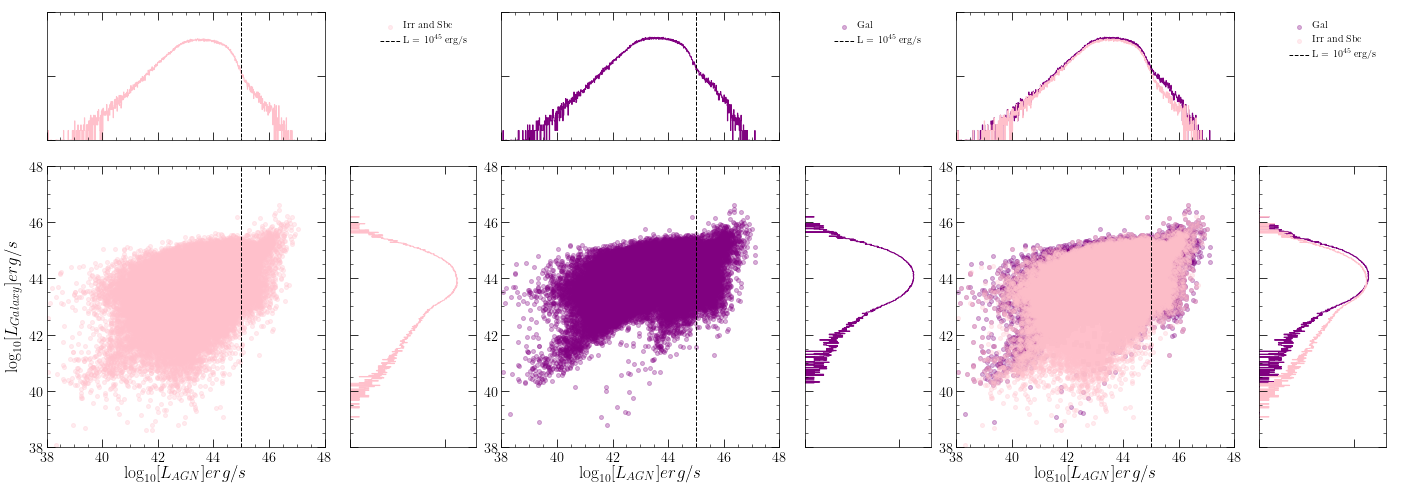

In [42]:
fig = plt.figure(figsize=(24,8))
gs = GridSpec(nrows=3,ncols=9, figure=fig)


ax = fig.add_subplot(gs[1:, 0:2])
#ax.scatter(IRG['LAGNerg'],IRG['LGalerg'],c = 'purple',label = 'Gal' ,alpha = 0.3)
ax.scatter(T1IRIS['LAGNerg'],T1IRIS['LIrrSbcerg'],c = 'pink',label = 'Irr and Sbc' ,alpha = 0.3)
ax.vlines(45, -20, 10**4, colors='black', linestyles='dashed', label='L = $10^{45}$ erg/s')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_ylabel(r'$ \log_{10}[L_{Galaxy}] erg/s$')
ax.set_xlabel(r'$ \log_{10}[L_{AGN}] erg/s$')
ax.set_xlim(38, 48)
ax.set_ylim(38,48)
handles, labels = ax.get_legend_handles_labels()

ax = fig.add_subplot(gs[0, 2])
ax.axis('off')
ax.legend(handles=handles, labels=labels)

ax = fig.add_subplot(gs[0, 0:2])
#ax.hist(IRG['LAGNerg'], bins=1000, histtype='step', color='purple', density=False, lw=1, label="x", log=True)
ax.hist(T1IRIS['LAGNerg'], bins=1000, histtype='step', color='pink', density=False, lw=1, label="x", log=True)
ax.vlines(45, -20, 10**4, colors='black', linestyles='dashed', label='L = $10^{45}$ erg/s')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_xlim(38, 48)
ax.set_ylim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)

ax = fig.add_subplot(gs[1:, 2])
#ax.hist(IRG['LGalerg'], bins=1000,orientation='horizontal', histtype='step', color='purple', density=False, lw=1, label="y", log=True)
ax.hist(T1IRIS['LIrrSbcerg'], bins=1000,orientation='horizontal', histtype='step', color='pink', density=False, lw=1, label="y", log=True)
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_ylim(38,48)
ax.set_xlim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)


###


ax = fig.add_subplot(gs[1:, 3:5])
ax.scatter(T1IRG['LAGNerg'],T1IRG['LGalerg'],c = 'purple',label = 'Gal' ,alpha = 0.3)
#ax.scatter(IRIS['LAGNerg'],IRIS['LIrrSbcerg'],c = 'pink',label = 'Irr and Sbc' ,alpha = 0.3)
ax.vlines(45, -20, 10**4, colors='black', linestyles='dashed', label='L = $10^{45}$ erg/s')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
#ax.set_ylabel(r'$ \log_{10}[L_{Galaxy}] erg/s$')
ax.set_xlabel(r'$ \log_{10}[L_{AGN}] erg/s$')
ax.set_xlim(38, 48)
ax.set_ylim(38,48)
handles, labels = ax.get_legend_handles_labels()

ax = fig.add_subplot(gs[0, 5])
ax.axis('off')
ax.legend(handles=handles, labels=labels)

ax = fig.add_subplot(gs[0, 3:5])
ax.hist(T1IRG['LAGNerg'], bins=1000, histtype='step', color='purple', density=False, lw=1, label="x", log=True)
#ax.hist(IRIS['LAGNerg'], bins=1000, histtype='step', color='pink', density=False, lw=1, label="x", log=True)
ax.vlines(45, -20, 10**4, colors='black', linestyles='dashed', label='L = $10^{45}$ erg/s')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_xlim(38, 48)
ax.set_ylim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)

ax = fig.add_subplot(gs[1:, 5])
ax.hist(T1IRG['LGalerg'], bins=1000,orientation='horizontal', histtype='step', color='purple', density=False, lw=1, label="y", log=True)
#ax.hist(IRIS['LIrrSbcerg'], bins=1000,orientation='horizontal', histtype='step', color='pink', density=False, lw=1, label="y", log=True)
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_ylim(38,48)
ax.set_xlim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)


###

ax = fig.add_subplot(gs[1:, 6:8])
ax.scatter(T1IRG['LAGNerg'],T1IRG['LGalerg'],c = 'purple',label = 'Gal' ,alpha = 0.3)
ax.scatter(T1IRIS['LAGNerg'],T1IRIS['LIrrSbcerg'],c = 'pink',label = 'Irr and Sbc' ,alpha = 0.3)
ax.vlines(45, -20, 10**4, colors='black', linestyles='dashed', label='L = $10^{45}$ erg/s')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
#ax.set_ylabel(r'$ \log_{10}[L_{Galaxy}] erg/s$')
ax.set_xlabel(r'$ \log_{10}[L_{AGN}] erg/s$')
ax.set_xlim(38, 48)
ax.set_ylim(38,48)
handles, labels = ax.get_legend_handles_labels()

ax = fig.add_subplot(gs[0, 8])
ax.axis('off')
ax.legend(handles=handles, labels=labels)

ax = fig.add_subplot(gs[0, 6:8])
ax.hist(T1IRG['LAGNerg'], bins=1000, histtype='step', color='purple', density=False, lw=1, label="x", log=True)
ax.hist(T1IRIS['LAGNerg'], bins=1000, histtype='step', color='pink', density=False, lw=1, label="x", log=True)
ax.vlines(45, -20, 10**4, colors='black', linestyles='dashed', label='L = $10^{45}$ erg/s')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_xlim(38, 48)
ax.set_ylim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)

ax = fig.add_subplot(gs[1:, -1])
ax.hist(T1IRG['LGalerg'], bins=1000,orientation='horizontal', histtype='step', color='purple', density=False, lw=1, label="y", log=True)
ax.hist(T1IRIS['LIrrSbcerg'], bins=1000,orientation='horizontal', histtype='step', color='pink', density=False, lw=1, label="y", log=True)
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_ylim(38,48)
ax.set_xlim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)